<a href="https://colab.research.google.com/github/Isradelpino/DO180-apps/blob/master/csvResult_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Cargar CSV
path = "/content/drive/MyDrive/ICCC26/master_experiment_results.csv"
df = pd.read_csv(path)

# Identificar columnas de métricas (todas las numéricas excepto Alpha)
metric_columns = [
    col for col in df.columns
    if col not in ["Alpha", "Injector", "Classifier", "Dataset"]
]

# Calcular la media por inyector y clasificador (promediando sobre Alpha)
mean_by_inj_clf = (
    df.groupby(["Injector", "Classifier"])[metric_columns]
      .mean()
      .reset_index()
)

mean_by_inj_clf.head()


Injector        Classifier  Accuracy  Balanced accuracy  \
0  GroupedRepresentationBias      DecisionTree  0.805099           0.746966   
1  GroupedRepresentationBias        GaussianNB  0.807715           0.794871   
2  GroupedRepresentationBias  GradientBoosting  0.853536           0.779291   
3  GroupedRepresentationBias        KNeighbors  0.832489           0.776853   
4  GroupedRepresentationBias          LightGBM  0.861826           0.800395   

   Error Rate  False Discovery Rate  False Negative Rate  False Omission Rate  \
0    0.194901              0.356432             0.378822             0.138341   
1    0.192285              0.384741             0.232736             0.094972   
2    0.146464              0.206909             0.381548             0.130487   
3    0.167511              0.296921             0.343501             0.124087   
4    0.138174              0.211828             0.332783             0.116555   

   False Positive Rate  Negative Predictive Value  Positive Predictive Value  \
0             0.127246                   0.861659                   0.643568   
1             0.177523                   0.905028                   0.615259   
2             0.059869                   0.869513                   0.793091   
3             0.102792                   0.875913                   0.703079   
4             0.066426                   0.883445                   0.788172   

   Precision  Recall (True Positive Rate)  True Negative Rate  Selection Rate  \
0   0.643568                     0.621178            0.872754        0.260829   
1   0.615259                     0.767264            0.822477        0.336772   
2   0.793091                     0.618452            0.940131        0.210958   
3   0.703079                     0.656499            0.897208        0.252457   
4   0.788172                     0.667217            0.933574        0.228838   

   Statistical Parity Difference  Disparate Impact  \
0                      -0.181304          0.394241   
1                      -0.310935          0.229452   
2                      -0.179987          0.278110   
3                      -0.194203          0.339568   
4                      -0.187684          0.301789   

   Equal Opportunity Difference  Average Abs Odds Difference  Theil Index  
0                     -0.077485                     0.082500     0.139237  
1                     -0.267247                     0.228561     0.103781  
2                     -0.126338                     0.094489     0.125338  
3                     -0.113619                     0.098160     0.123587  
4                     -0.111293                     0.087741     0.112251

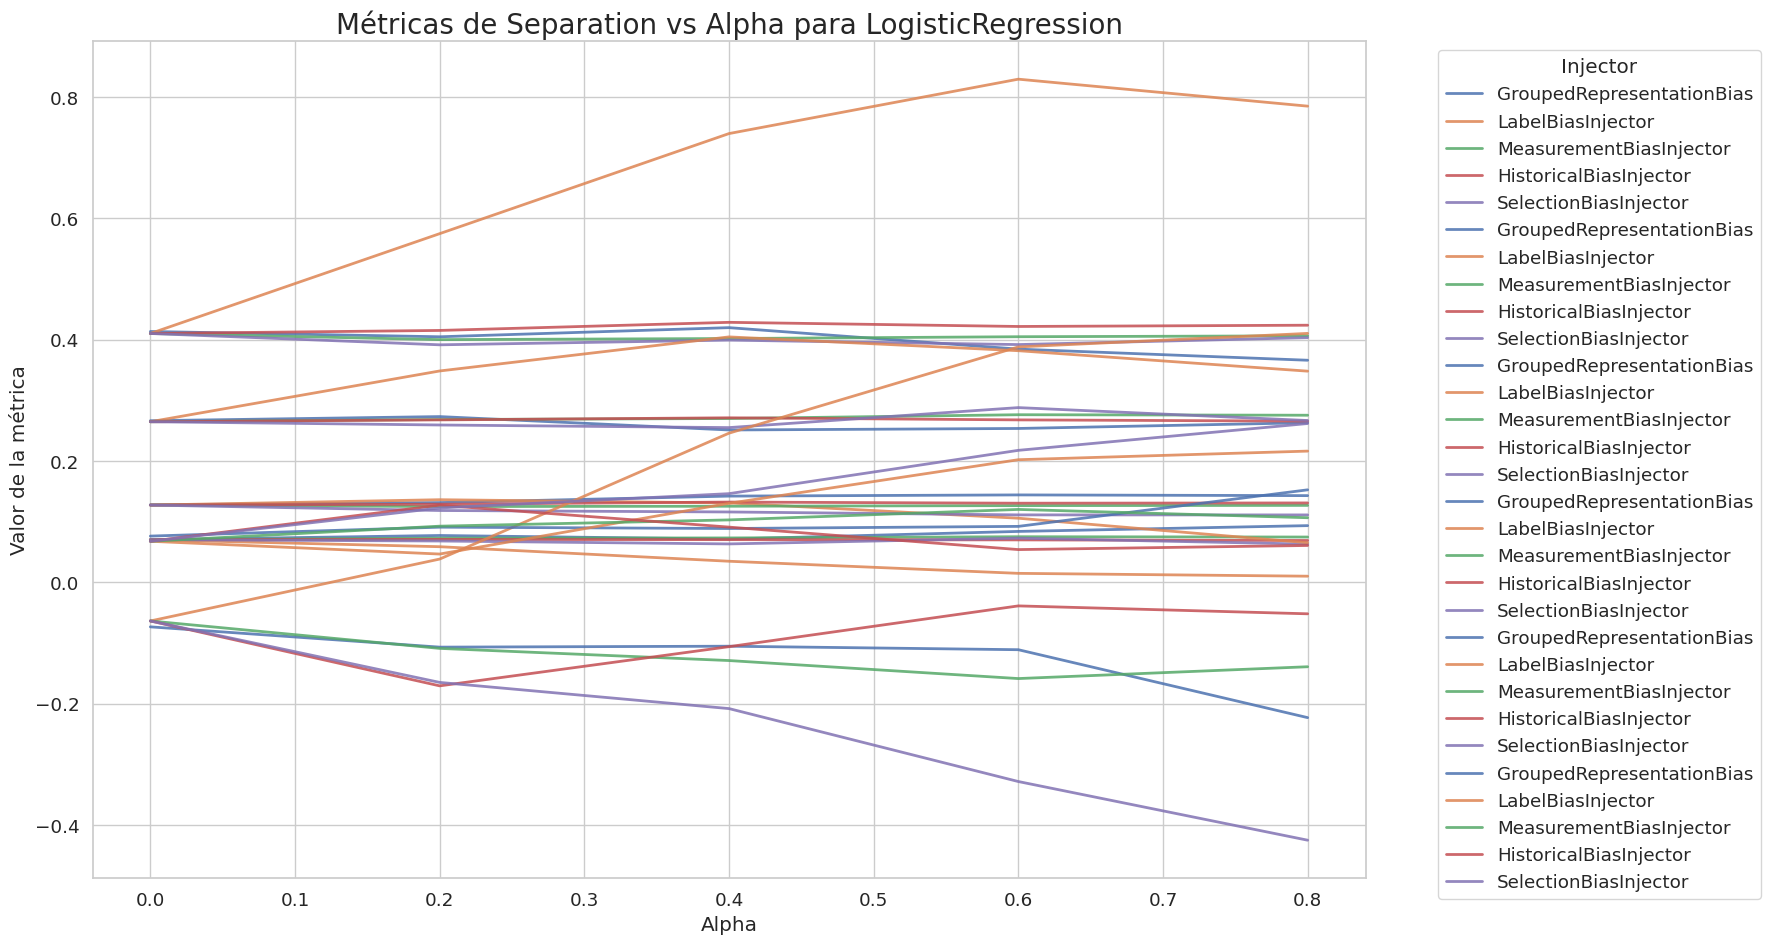

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar CSV
path = "/content/drive/MyDrive/ICCC26/master_experiment_results.csv"
df = pd.read_csv(path)

# Seleccionar el clasificador que quieres visualizar
clasificador = "LogisticRegression"   # <-- cámbialo por el que quieras

sub = df[df["Classifier"] == clasificador]

# Métricas de Separation
separation_metrics = [
    "False Negative Rate",
    "False Positive Rate",
    "False Discovery Rate",
    "False Omission Rate",
    "Equal Opportunity Difference",
    "Average Abs Odds Difference"
]

plt.figure(figsize=(18, 10))
plt.title(f"Métricas de Separation vs Alpha para {clasificador}", fontsize=20)

for metric in separation_metrics:
    sns.lineplot(
        data=sub,
        x="Alpha",
        y=metric,
        hue="Injector",
        linewidth=2,
        alpha=0.85
    )

plt.xlabel("Alpha")
plt.ylabel("Valor de la métrica")
plt.legend(title="Injector", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
separation_metrics = [
    "False Negative Rate",
    "False Positive Rate",
    "False Discovery Rate",
    "False Omission Rate",
    "Equal Opportunity Difference",
    "Average Abs Odds Difference"
]

for clf in df["Classifier"].unique():
    injectors = df[df["Classifier"] == clf]["Injector"].nunique()
    num_lines = len(separation_metrics) * injectors
    print(f"{clf}: {num_lines} líneas ({injectors} inyectores × 6 métricas)")


LogisticRegression: 30 líneas (5 inyectores × 6 métricas)
DecisionTree: 30 líneas (5 inyectores × 6 métricas)
RandomForest: 30 líneas (5 inyectores × 6 métricas)
LinearSVC: 30 líneas (5 inyectores × 6 métricas)
MLPClassifier: 30 líneas (5 inyectores × 6 métricas)
KNeighbors: 30 líneas (5 inyectores × 6 métricas)
GaussianNB: 30 líneas (5 inyectores × 6 métricas)
GradientBoosting: 30 líneas (5 inyectores × 6 métricas)
XGBoost: 30 líneas (5 inyectores × 6 métricas)
LightGBM: 30 líneas (5 inyectores × 6 métricas)


In [ ]:
df["Injector"].unique()


array(['GroupedRepresentationBias', 'LabelBiasInjector',
       'MeasurementBiasInjector', 'HistoricalBiasInjector',
       'SelectionBiasInjector'], dtype=object)

/tmp/ipython-input-734463480.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


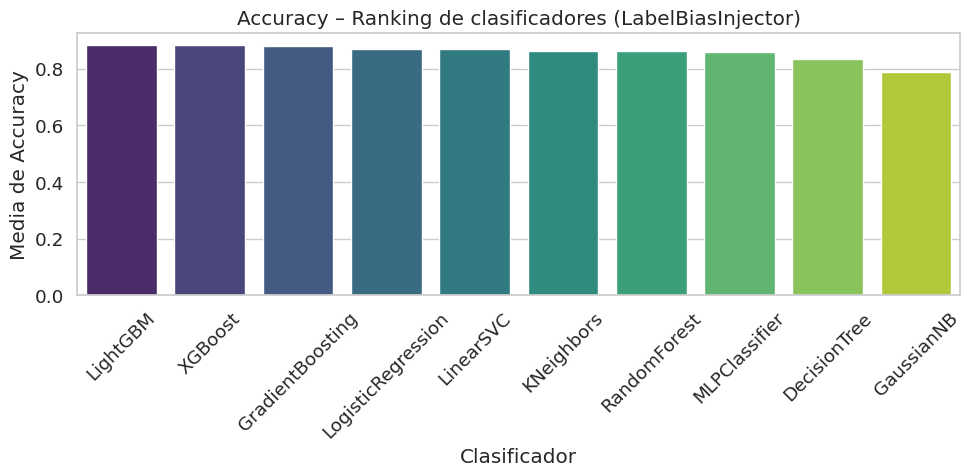

/tmp/ipython-input-734463480.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


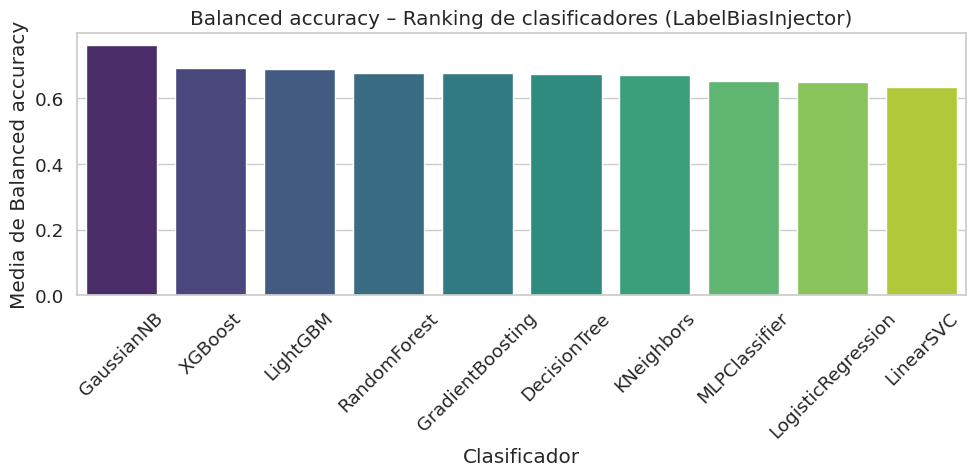

/tmp/ipython-input-734463480.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


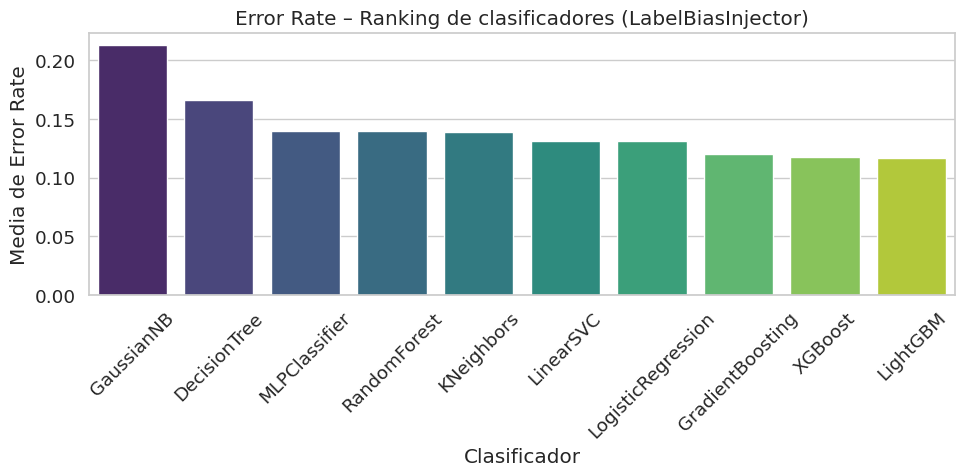

/tmp/ipython-input-734463480.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


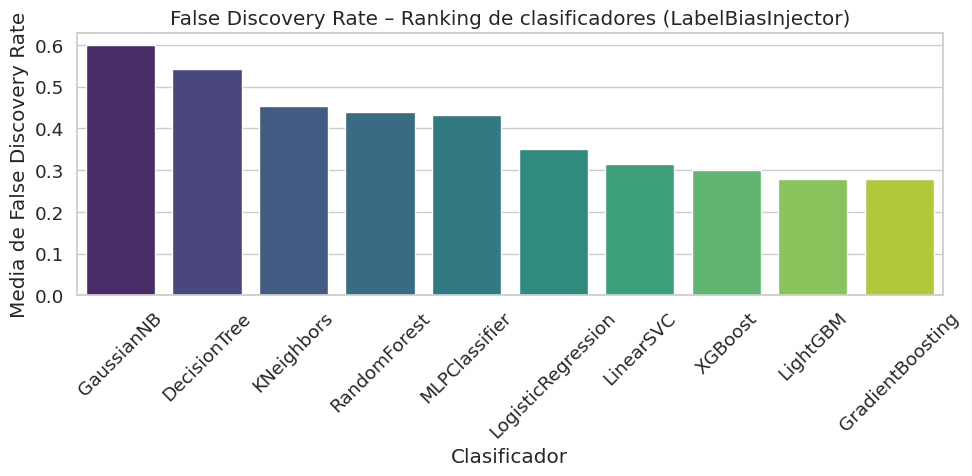

/tmp/ipython-input-734463480.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


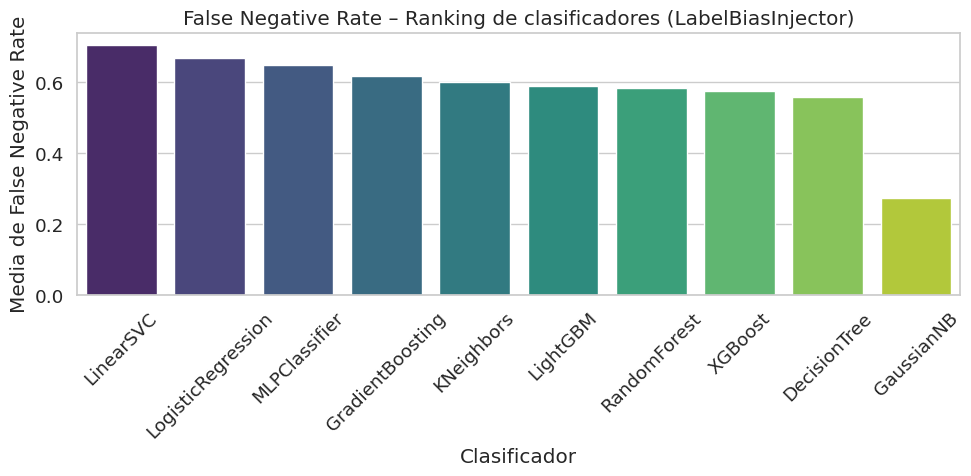

/tmp/ipython-input-734463480.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


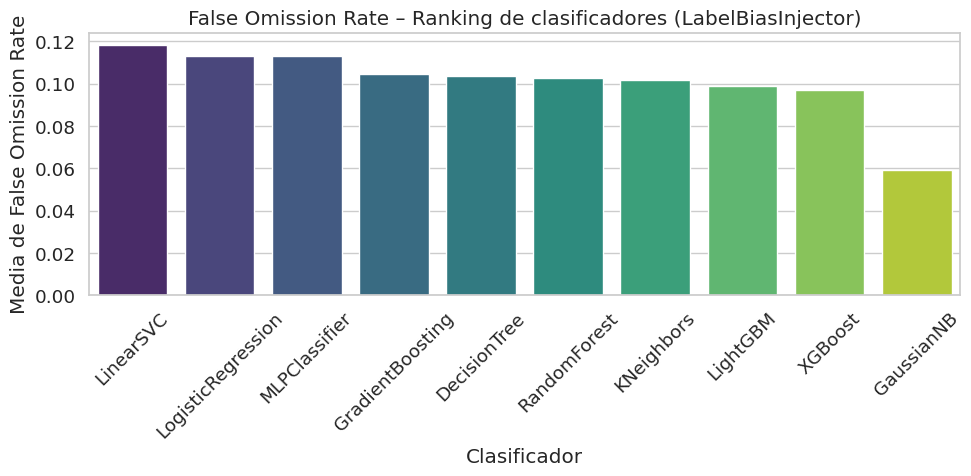

/tmp/ipython-input-734463480.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


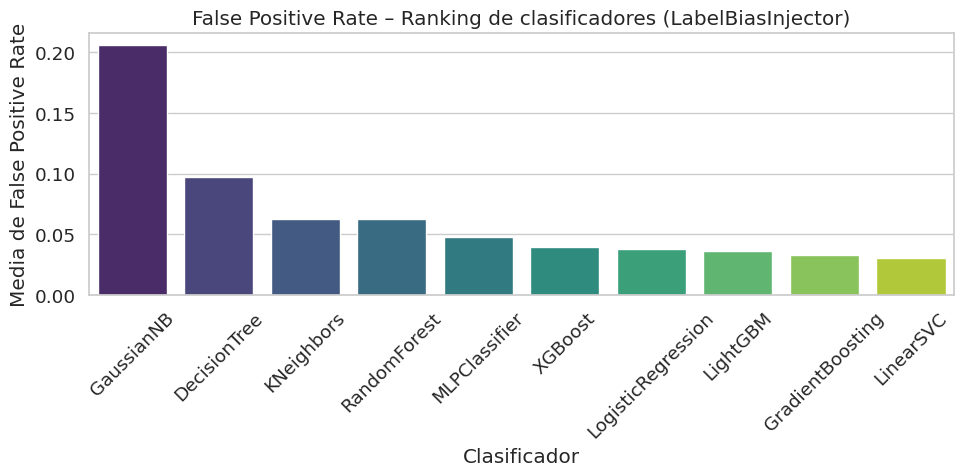

/tmp/ipython-input-734463480.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


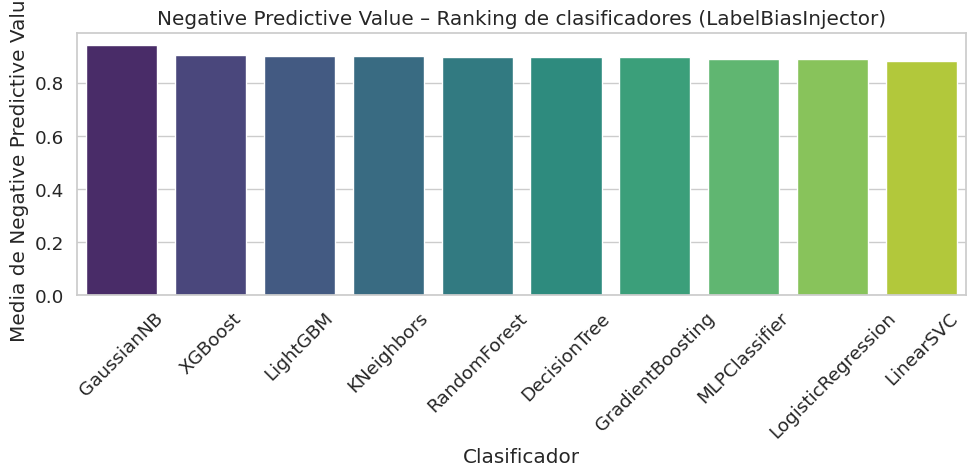

/tmp/ipython-input-734463480.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


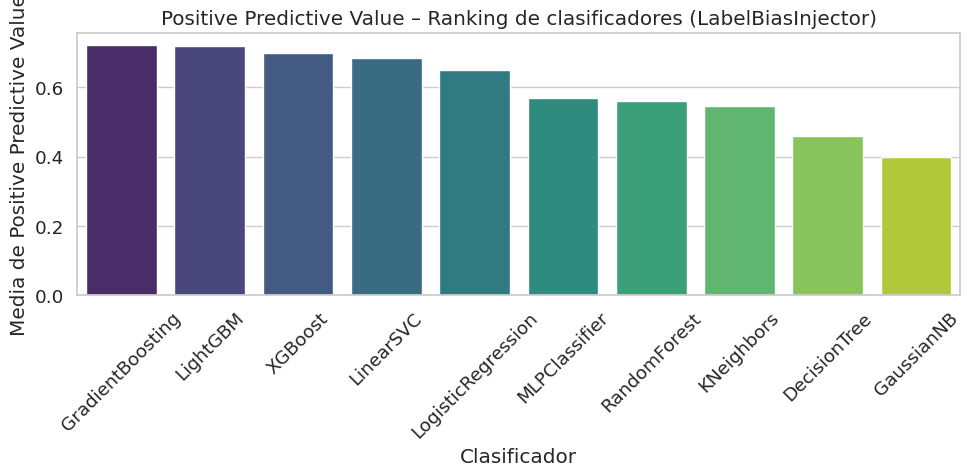

/tmp/ipython-input-734463480.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


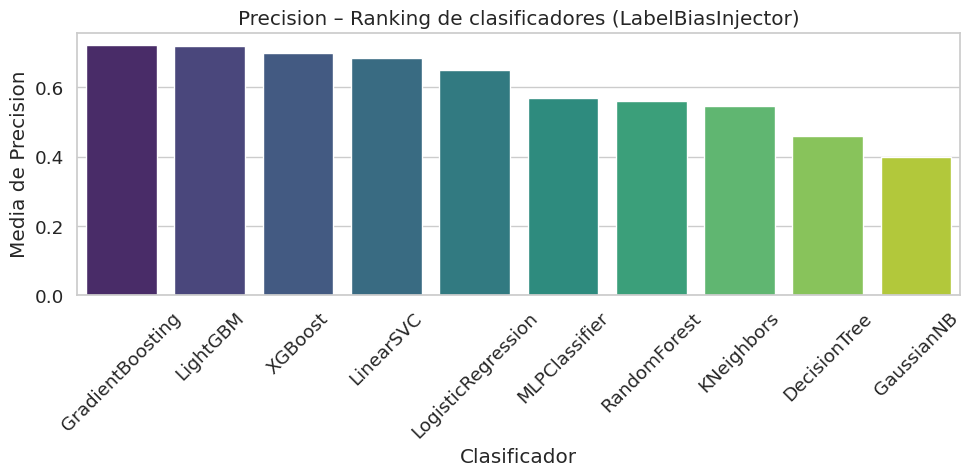

/tmp/ipython-input-734463480.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


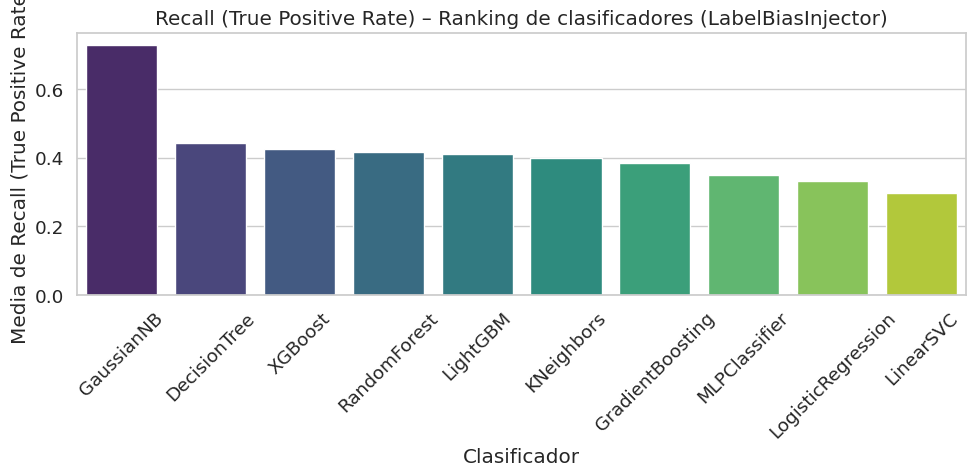

/tmp/ipython-input-734463480.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


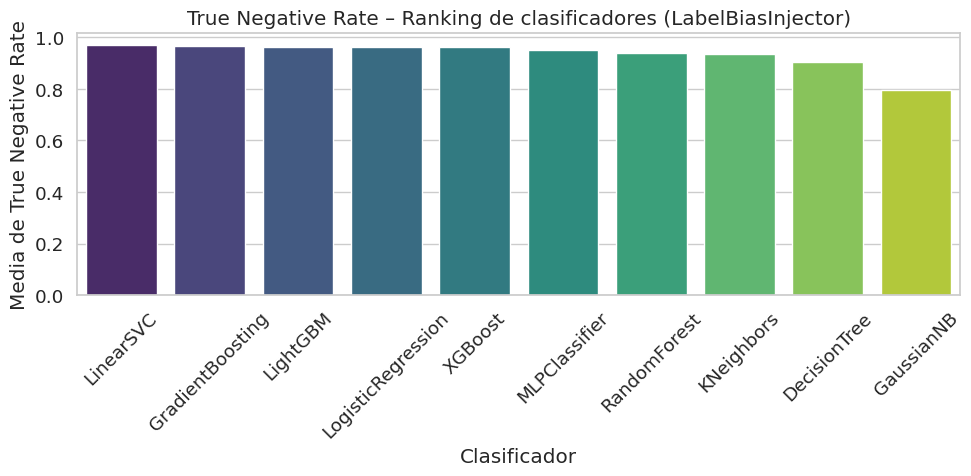

/tmp/ipython-input-734463480.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


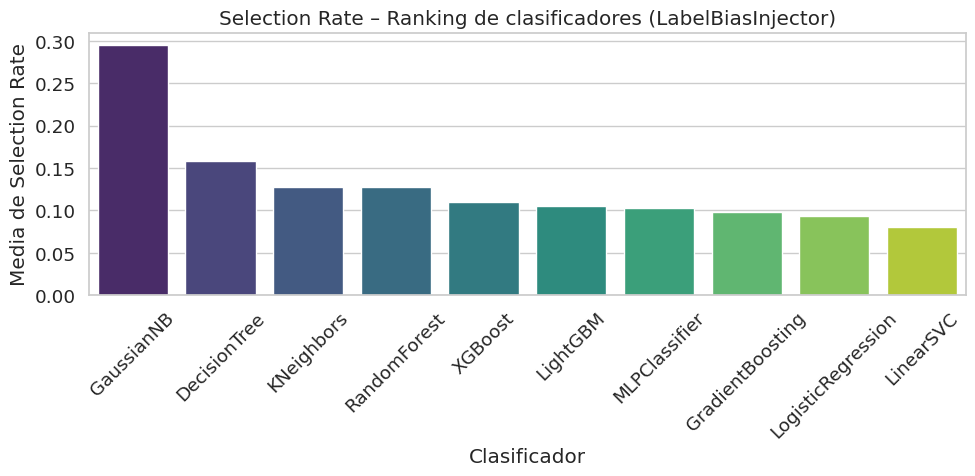

/tmp/ipython-input-734463480.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


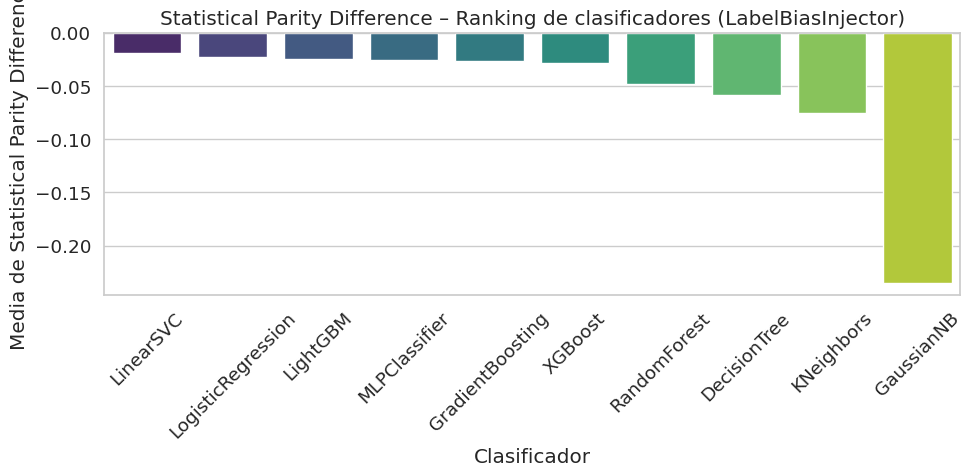

/tmp/ipython-input-734463480.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


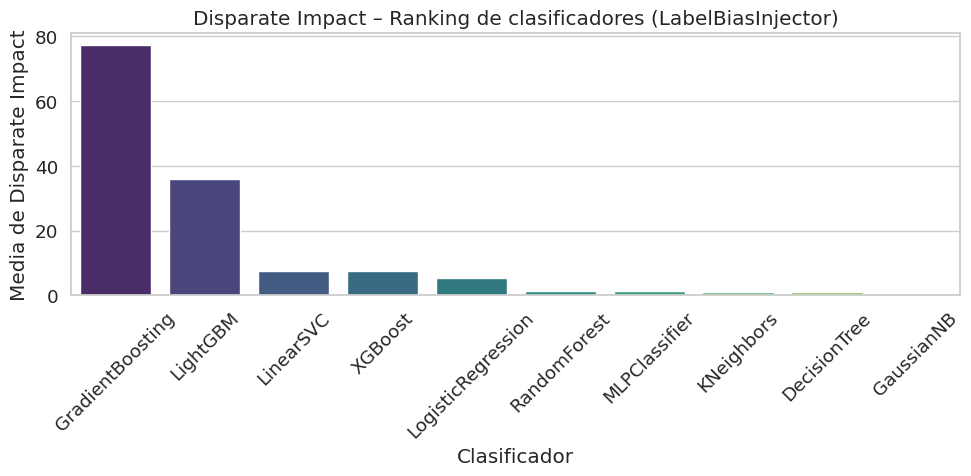

/tmp/ipython-input-734463480.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


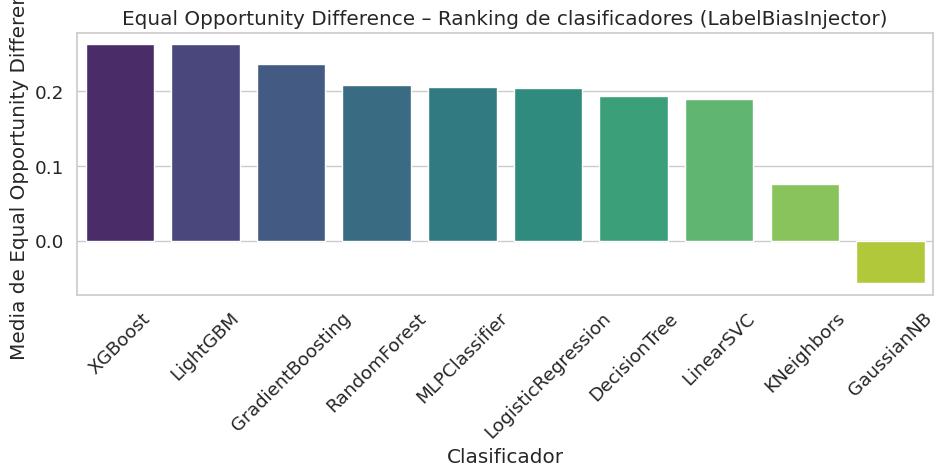

/tmp/ipython-input-734463480.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


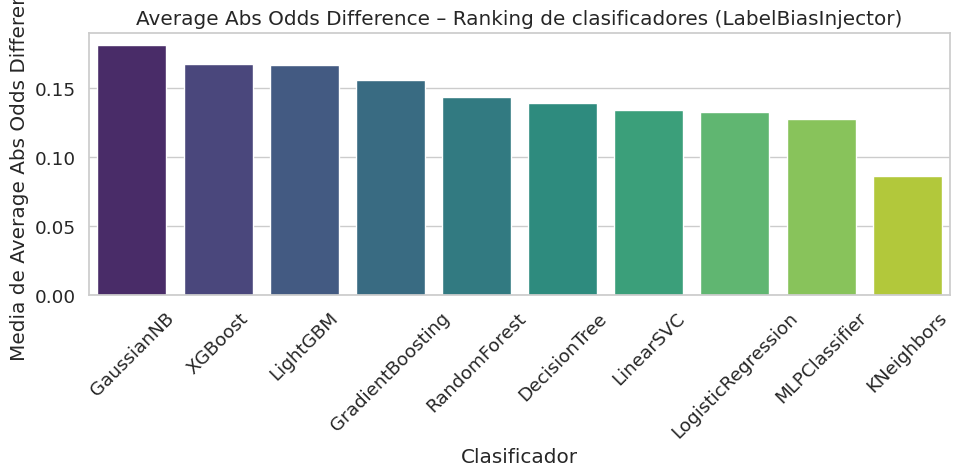

/tmp/ipython-input-734463480.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


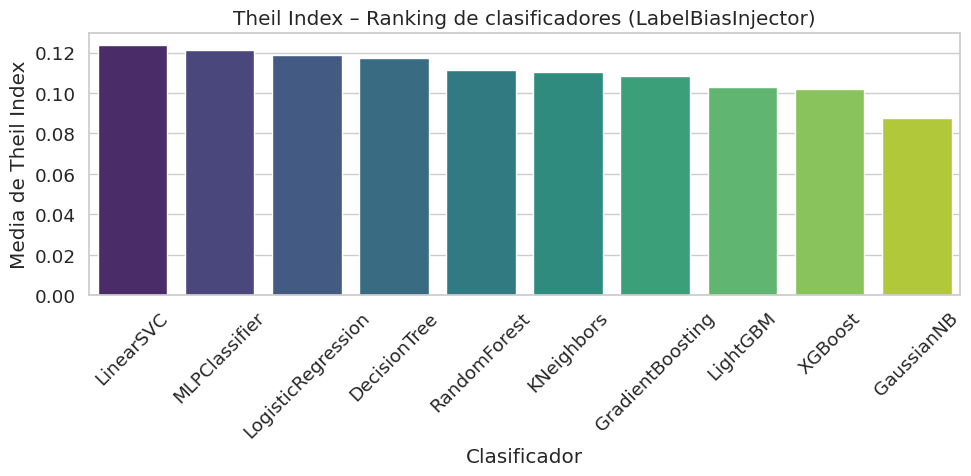

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar CSV
path = "/content/drive/MyDrive/ICCC26/master_experiment_results.csv"
df = pd.read_csv(path)

# Seleccionar el inyector
inyector = "LabelBiasInjector"   # cámbialo por el que quieras

# Filtrar datos del inyector
sub = df[df["Injector"] == inyector]

# Identificar métricas numéricas
metric_columns = [
    col for col in df.columns
    if col not in ["Alpha", "Injector", "Classifier", "Dataset"]
]

# Para cada métrica, generamos un ranking de clasificadores
for metric in metric_columns:

    # Calcular media por clasificador (promedio sobre todas las alphas)
    ranking = (
        sub.groupby("Classifier")[metric]
           .mean()
           .sort_values(ascending=False)   # mejor → peor
    )

    # --- GRÁFICO DE BARRAS ORDENADAS ---
    plt.figure(figsize=(10, 5))
    sns.barplot(
        x=ranking.index,
        y=ranking.values,
        palette="viridis"
    )
    plt.xticks(rotation=45)
    plt.title(f"{metric} – Ranking de clasificadores ({inyector})")
    plt.ylabel(f"Media de {metric}")
    plt.xlabel("Clasificador")
    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/ICCC26/master_experiment_results.csv")

inyector = "LabelBiasInjector"
sub = df[df["Injector"] == inyector]

metric_columns = [
    col for col in df.columns
    if col not in ["Alpha", "Injector", "Classifier", "Dataset"]
]

votes = {}

for metric in metric_columns:
    votes[metric] = {}
    for alpha, group in sub.groupby("Alpha"):
        ranking = (
            group.groupby("Classifier")[metric]
                 .mean()
                 .sort_values(ascending=False)
                 .index.tolist()
        )
        votes[metric][alpha] = ranking

votes


{'Accuracy': {0.0: ['LightGBM',
   'XGBoost',
   'GradientBoosting',
   'LogisticRegression',
   'LinearSVC',
   'KNeighbors',
   'RandomForest',
   'MLPClassifier',
   'DecisionTree',
   'GaussianNB'],
  0.2: ['LightGBM',
   'XGBoost',
   'GradientBoosting',
   'MLPClassifier',
   'LogisticRegression',
   'KNeighbors',
   'LinearSVC',
   'RandomForest',
   'DecisionTree',
   'GaussianNB'],
  0.4: ['XGBoost',
   'LightGBM',
   'GradientBoosting',
   'LinearSVC',
   'LogisticRegression',
   'MLPClassifier',
   'KNeighbors',
   'RandomForest',
   'DecisionTree',
   'GaussianNB'],
  0.6000000000000001: ['LightGBM',
   'GradientBoosting',
   'XGBoost',
   'LinearSVC',
   'LogisticRegression',
   'RandomForest',
   'KNeighbors',
   'MLPClassifier',
   'DecisionTree',
   'GaussianNB'],
  0.8: ['LightGBM',
   'GradientBoosting',
   'XGBoost',
   'LinearSVC',
   'LogisticRegression',
   'RandomForest',
   'KNeighbors',
   'MLPClassifier',
   'DecisionTree',
   'GaussianNB']},
 'Balanced accura

In [ ]:
from collections import defaultdict

borda_metric = {}

for metric in metric_columns:
    scores = defaultdict(int)
    for alpha in votes[metric]:
        ranking = votes[metric][alpha]
        for pos, clf in enumerate(ranking[::-1]):
            scores[clf] += pos
    borda_metric[metric] = sorted(scores.items(), key=lambda x: x[1], reverse=True)

borda_metric


{'Accuracy': [('LightGBM', 44),
  ('XGBoost', 39),
  ('GradientBoosting', 37),
  ('LinearSVC', 26),
  ('LogisticRegression', 26),
  ('KNeighbors', 17),
  ('MLPClassifier', 16),
  ('RandomForest', 15),
  ('DecisionTree', 5),
  ('GaussianNB', 0)],
 'Balanced accuracy': [('GaussianNB', 45),
  ('XGBoost', 36),
  ('LightGBM', 29),
  ('KNeighbors', 23),
  ('DecisionTree', 22),
  ('GradientBoosting', 22),
  ('RandomForest', 21),
  ('MLPClassifier', 14),
  ('LogisticRegression', 9),
  ('LinearSVC', 4)],
 'Error Rate': [('GaussianNB', 45),
  ('DecisionTree', 40),
  ('RandomForest', 30),
  ('MLPClassifier', 29),
  ('KNeighbors', 28),
  ('LogisticRegression', 19),
  ('LinearSVC', 19),
  ('GradientBoosting', 8),
  ('XGBoost', 6),
  ('LightGBM', 1)],
 'False Discovery Rate': [('GaussianNB', 45),
  ('DecisionTree', 40),
  ('KNeighbors', 32),
  ('RandomForest', 29),
  ('MLPClassifier', 26),
  ('LogisticRegression', 22),
  ('XGBoost', 12),
  ('LinearSVC', 12),
  ('GradientBoosting', 4),
  ('LightGBM',

In [ ]:
groups = {
    "performance": [
        "Accuracy","Balanced Accuracy","Error Rate","Precision","Recall (True Positive Rate)",
        "True Negative Rate","False Positive Rate","False Negative Rate",
        "Positive Predictive Value","Negative Predictive Value"
    ],
    "independence": [
        "Statistical Parity Difference","Disparate Impact","Selection Rate"
    ],
    "separation": [
        "Equal Opportunity Difference","Average Abs Odds Difference"
    ],
    "sufficiency": [
        "False Omission Rate","False Discovery Rate"
    ],
    "entropy": ["Theil Index"]
}


In [ ]:
df.columns.tolist()


['Accuracy',
 'Balanced accuracy',
 'Error Rate',
 'False Discovery Rate',
 'False Negative Rate',
 'False Omission Rate',
 'False Positive Rate',
 'Negative Predictive Value',
 'Positive Predictive Value',
 'Precision',
 'Recall (True Positive Rate)',
 'True Negative Rate',
 'Selection Rate',
 'Statistical Parity Difference',
 'Disparate Impact',
 'Equal Opportunity Difference',
 'Average Abs Odds Difference',
 'Theil Index',
 'Alpha',
 'Injector',
 'Classifier',
 'Dataset']

In [ ]:
metric_columns = [
    col for col in df.columns
    if col not in ["Alpha", "Injector", "Classifier", "Dataset"]
]


In [ ]:
def find_metric(df, keywords):
    for col in df.columns:
        if all(k.lower() in col.lower() for k in keywords):
            return col
    return None


In [ ]:
balanced_acc = find_metric(df, ["balanced", "accuracy"])


In [ ]:
def find(df, *keywords):
    for col in df.columns:
        if all(k.lower() in col.lower() for k in keywords):
            return col
    return None

groups = {
    "performance": [
        find(df, "accuracy"),
        find(df, "balanced", "accuracy"),
        find(df, "error"),
        find(df, "precision"),
        find(df, "recall"),
        find(df, "true", "negative"),
        find(df, "false", "positive"),
        find(df, "false", "negative"),
        find(df, "positive", "predictive"),
        find(df, "negative", "predictive")
    ],
    "independence": [
        find(df, "statistical", "parity"),
        find(df, "disparate", "impact"),
        find(df, "selection", "rate")
    ],
    "separation": [
        find(df, "equal", "opportunity"),
        find(df, "average", "odds")
    ],
    "sufficiency": [
        find(df, "false", "omission"),
        find(df, "false", "discovery")
    ],
    "entropy": [
        find(df, "theil")
    ]
}

# Eliminar None
for g in groups:
    groups[g] = [m for m in groups[g] if m is not None]

groups


{'performance': ['Accuracy',
  'Balanced accuracy',
  'Error Rate',
  'Precision',
  'Recall (True Positive Rate)',
  'True Negative Rate',
  'False Positive Rate',
  'False Negative Rate',
  'Positive Predictive Value',
  'Negative Predictive Value'],
 'independence': ['Statistical Parity Difference',
  'Disparate Impact',
  'Selection Rate'],
 'separation': ['Equal Opportunity Difference', 'Average Abs Odds Difference'],
 'sufficiency': ['False Omission Rate', 'False Discovery Rate'],
 'entropy': ['Theil Index']}

Clasificadores: ['DecisionTree', 'GaussianNB', 'GradientBoosting', 'KNeighbors', 'LightGBM', 'LinearSVC', 'LogisticRegression', 'MLPClassifier', 'RandomForest', 'XGBoost']
Métricas detectadas: ['Accuracy', 'Balanced accuracy', 'Error Rate', 'False Discovery Rate', 'False Negative Rate', 'False Omission Rate', 'False Positive Rate', 'Negative Predictive Value', 'Positive Predictive Value', 'Precision', 'Recall (True Positive Rate)', 'True Negative Rate', 'Selection Rate', 'Statistical Parity Difference', 'Disparate Impact', 'Equal Opportunity Difference', 'Average Abs Odds Difference', 'Theil Index']

Grupos de métricas detectados:
  performance: ['Accuracy', 'Balanced accuracy', 'Error Rate', 'Precision', 'Recall (True Positive Rate)', 'True Negative Rate', 'False Positive Rate', 'False Negative Rate', 'Positive Predictive Value', 'Negative Predictive Value']
  independence: ['Statistical Parity Difference', 'Disparate Impact', 'Selection Rate']
  separation: ['Equal Opportunity Differ

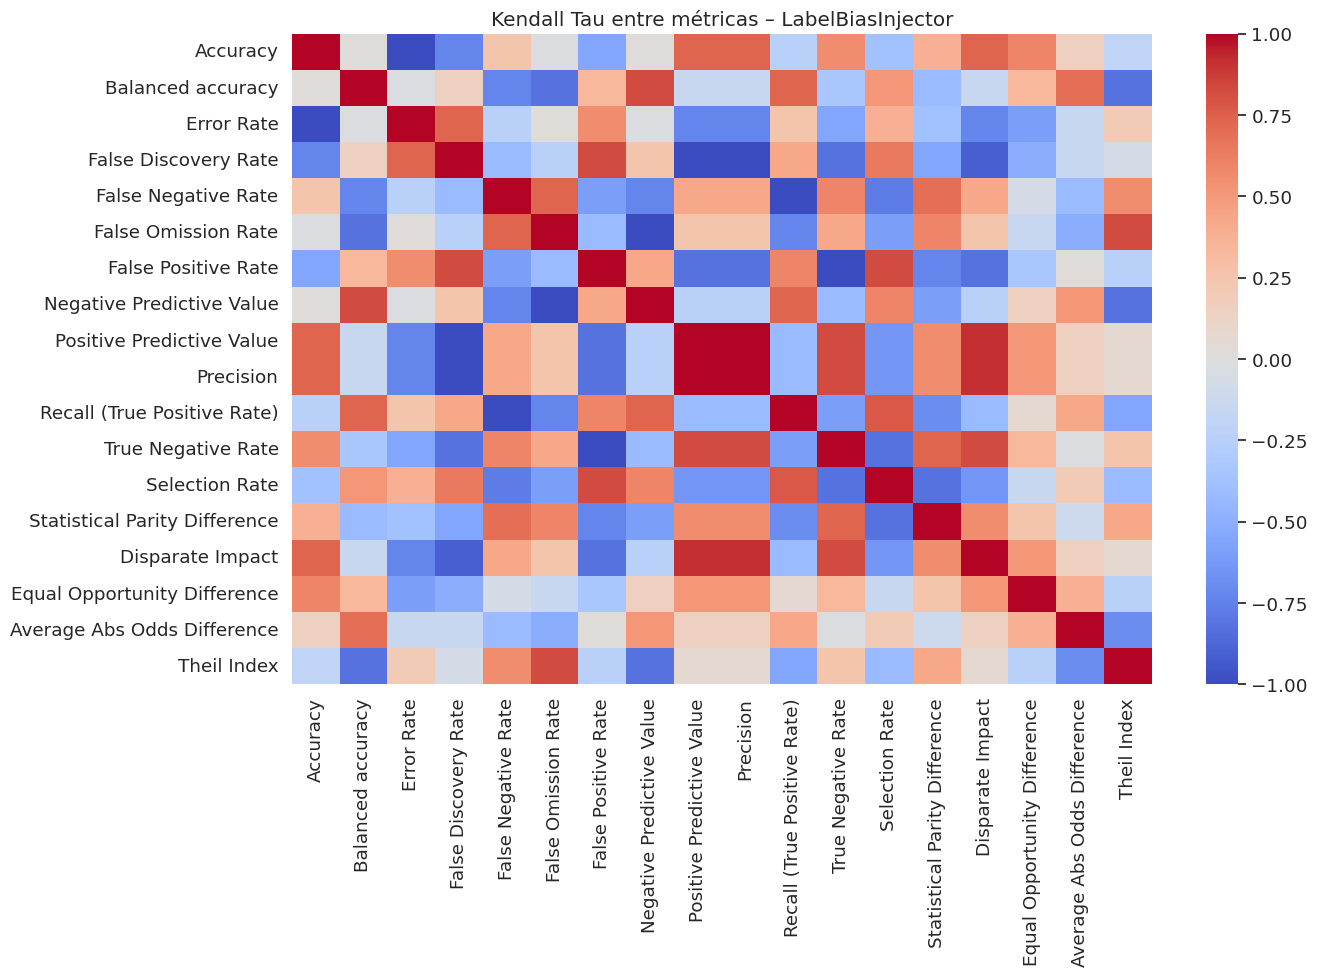

/tmp/ipython-input-4157470878.py:214: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clf_names, y=clf_scores, palette="viridis")


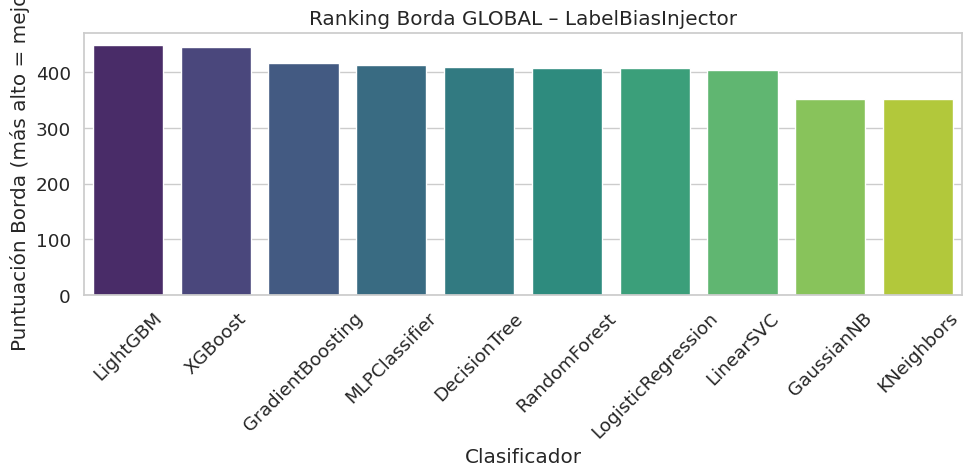

/tmp/ipython-input-4157470878.py:228: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clf_names, y=clf_scores, palette="magma")


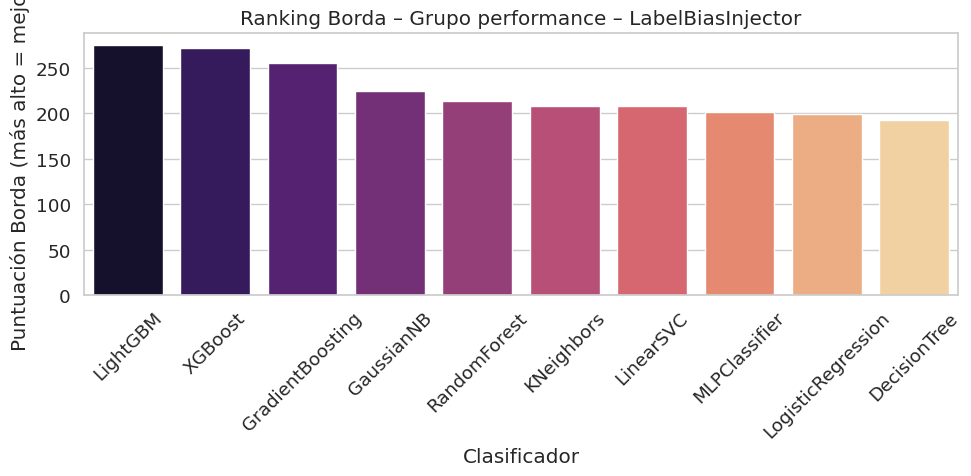

/tmp/ipython-input-4157470878.py:228: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clf_names, y=clf_scores, palette="magma")


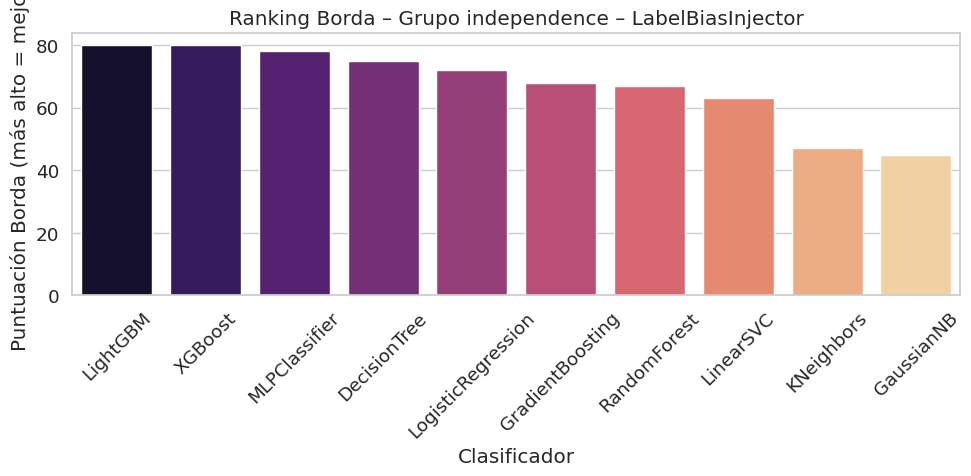

/tmp/ipython-input-4157470878.py:228: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clf_names, y=clf_scores, palette="magma")


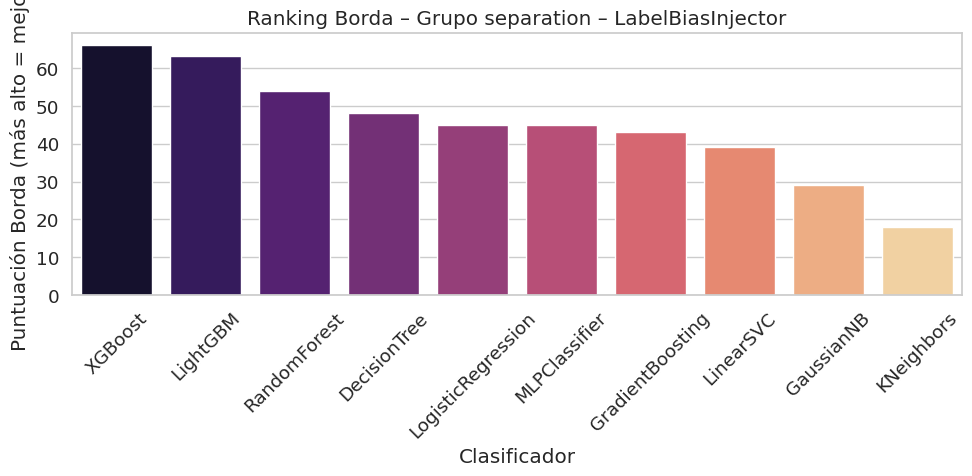

/tmp/ipython-input-4157470878.py:228: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clf_names, y=clf_scores, palette="magma")


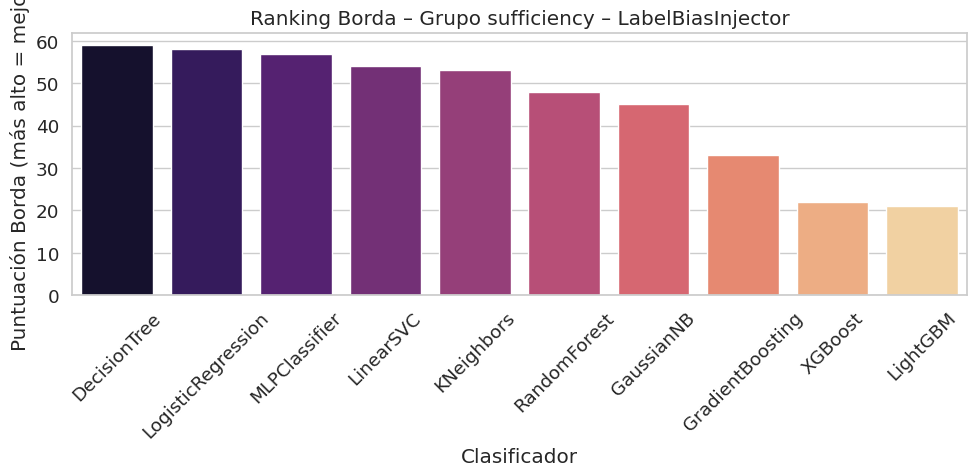

/tmp/ipython-input-4157470878.py:228: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clf_names, y=clf_scores, palette="magma")


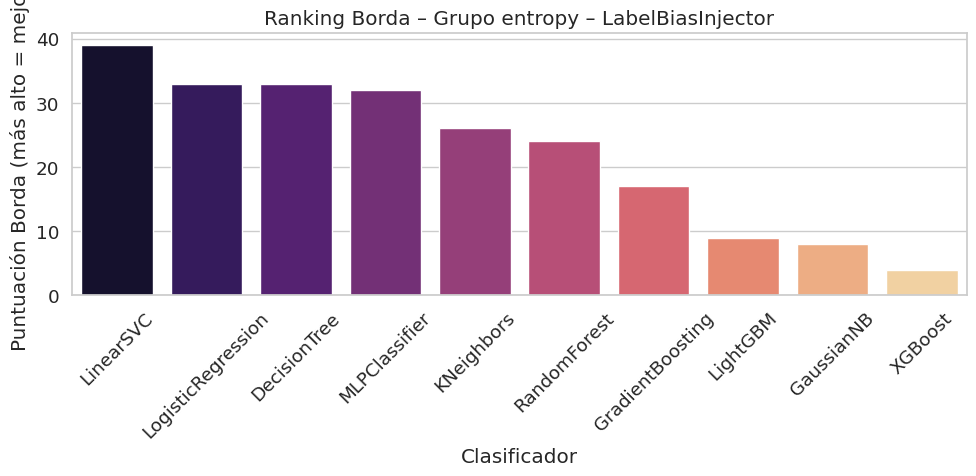

In [ ]:
import pandas as pd
import numpy as np
from collections import defaultdict
from scipy.stats import kendalltau
import seaborn as sns
import matplotlib.pyplot as plt

# =========================
# 1. CONFIGURACIÓN BÁSICA
# =========================

csv_path = "/content/drive/MyDrive/ICCC26/master_experiment_results.csv"
inyector = "LabelBiasInjector"   # cámbialo si quieres otro

df = pd.read_csv(csv_path)
sub = df[df["Injector"] == inyector].copy()

# Identificar columnas de métricas (todo lo que no es meta)
meta_cols = ["Alpha", "Injector", "Classifier", "Dataset"]
metric_columns = [c for c in df.columns if c not in meta_cols]

classifiers = sorted(sub["Classifier"].unique())

print("Clasificadores:", classifiers)
print("Métricas detectadas:", metric_columns)

# =========================
# 2. FUNCIÓN AUXILIAR PARA ENCONTRAR MÉTRICAS POR PALABRAS CLAVE
# =========================

def find_metric(columns, *keywords):
    for col in columns:
        if all(k.lower() in col.lower() for k in keywords):
            return col
    return None

# =========================
# 3. CONSTRUCCIÓN AUTOMÁTICA DE GRUPOS DE MÉTRICAS
# =========================

groups = {
    "performance": [
        find_metric(metric_columns, "accuracy"),
        find_metric(metric_columns, "balanced", "accuracy"),
        find_metric(metric_columns, "error"),
        find_metric(metric_columns, "precision"),
        find_metric(metric_columns, "recall"),
        find_metric(metric_columns, "true", "negative"),
        find_metric(metric_columns, "false", "positive"),
        find_metric(metric_columns, "false", "negative"),
        find_metric(metric_columns, "positive", "predictive"),
        find_metric(metric_columns, "negative", "predictive"),
    ],
    "independence": [
        find_metric(metric_columns, "statistical", "parity"),
        find_metric(metric_columns, "disparate", "impact"),
        find_metric(metric_columns, "selection", "rate"),
    ],
    "separation": [
        find_metric(metric_columns, "equal", "opportunity"),
        find_metric(metric_columns, "average", "odds"),
    ],
    "sufficiency": [
        find_metric(metric_columns, "false", "omission"),
        find_metric(metric_columns, "false", "discovery"),
    ],
    "entropy": [
        find_metric(metric_columns, "theil"),
    ],
}

# Limpiar Nones
for g in groups:
    groups[g] = [m for m in groups[g] if m is not None]

print("\nGrupos de métricas detectados:")
for g, ms in groups.items():
    print(f"  {g}: {ms}")

# =========================
# 4. VOTOS: CADA (ALPHA, MÉTRICA, CLASIFICADOR) COMO VOTO
# =========================

votes = {}

for metric in metric_columns:
    votes[metric] = {}
    for alpha, group in sub.groupby("Alpha"):
        ranking = (
            group.groupby("Classifier")[metric]
                 .mean()
                 .sort_values(ascending=False)
                 .index.tolist()
        )
        votes[metric][alpha] = ranking

# =========================
# 5. BORDA POR MÉTRICA (USANDO TODAS LAS ALPHAS COMO VOTOS)
# =========================

borda_metric = {}

for metric in metric_columns:
    scores = defaultdict(int)
    for alpha in votes[metric]:
        ranking = votes[metric][alpha]
        # último recibe 0, primero recibe más
        for pos, clf in enumerate(ranking[::-1]):
            scores[clf] += pos
    borda_metric[metric] = sorted(scores.items(), key=lambda x: x[1], reverse=True)

print("\nRanking Borda por métrica (ejemplo de una métrica):")
example_metric = metric_columns[0]
print(example_metric, "→", borda_metric[example_metric])

# =========================
# 6. BORDA POR GRUPO DE MÉTRICAS
# =========================

borda_group = {}

for group_name, metrics in groups.items():
    scores = defaultdict(int)
    for metric in metrics:
        for alpha in votes[metric]:
            ranking = votes[metric][alpha]
            for pos, clf in enumerate(ranking[::-1]):
                scores[clf] += pos
    borda_group[group_name] = sorted(scores.items(), key=lambda x: x[1], reverse=True)

print("\nRanking Borda por grupo de métricas:")
for g, ranking in borda_group.items():
    print(g, "→", ranking)

# =========================
# 7. BORDA GLOBAL (TODAS LAS MÉTRICAS, TODAS LAS ALPHAS)
# =========================

scores_global = defaultdict(int)

for metric in metric_columns:
    for alpha in votes[metric]:
        ranking = votes[metric][alpha]
        for pos, clf in enumerate(ranking[::-1]):
            scores_global[clf] += pos

borda_global = sorted(scores_global.items(), key=lambda x: x[1], reverse=True)

print("\nRanking Borda GLOBAL (todas las métricas, todas las alphas):")
print(borda_global)

# =========================
# 8. KENDALL'S W POR GRUPO DE MÉTRICAS
# =========================

def kendall_w(rank_matrix):
    k, n = rank_matrix.shape
    R = rank_matrix.sum(axis=0)
    R_bar = np.mean(R)
    S = np.sum((R - R_bar)**2)
    W = 12 * S / (k**2 * (n**3 - n))
    return W

kendall_groups = {}

for group_name, metrics in groups.items():
    matrices = []
    for metric in metrics:
        r = (
            sub.groupby("Classifier")[metric]
               .mean()
               .sort_values(ascending=False)
        )
        ranks = r.rank(ascending=False, method="dense").reindex(classifiers).values
        matrices.append(ranks)
    matrices = np.array(matrices)
    if matrices.shape[0] > 1:
        kendall_groups[group_name] = kendall_w(matrices)
    else:
        kendall_groups[group_name] = np.nan  # no tiene sentido con 1 métrica

print("\nKendall's W por grupo de métricas:")
for g, w in kendall_groups.items():
    print(f"{g}: {w}")

# =========================
# 9. HEATMAP DE SIMILITUD ENTRE MÉTRICAS (KENDALL TAU)
# =========================

tau_matrix = pd.DataFrame(index=metric_columns, columns=metric_columns, dtype=float)

for m1 in metric_columns:
    for m2 in metric_columns:
        r1 = sub.groupby("Classifier")[m1].mean().rank(ascending=False)
        r2 = sub.groupby("Classifier")[m2].mean().rank(ascending=False)
        tau, _ = kendalltau(r1, r2)
        tau_matrix.loc[m1, m2] = tau

plt.figure(figsize=(14, 10))
sns.heatmap(tau_matrix.astype(float), cmap="coolwarm", center=0, annot=False)
plt.title(f"Kendall Tau entre métricas – {inyector}")
plt.tight_layout()
plt.show()

# =========================
# 10. DIAGRAMAS DE BARRAS PARA LOS RANKINGS BORDA
# =========================

# --- A) BARRAS PARA RANKING GLOBAL ---
clf_names = [x[0] for x in borda_global]
clf_scores = [x[1] for x in borda_global]

plt.figure(figsize=(10, 5))
sns.barplot(x=clf_names, y=clf_scores, palette="viridis")
plt.xticks(rotation=45)
plt.title(f"Ranking Borda GLOBAL – {inyector}")
plt.ylabel("Puntuación Borda (más alto = mejor)")
plt.xlabel("Clasificador")
plt.tight_layout()
plt.show()

# --- B) BARRAS PARA CADA GRUPO DE MÉTRICAS ---
for group_name, ranking in borda_group.items():
    clf_names = [x[0] for x in ranking]
    clf_scores = [x[1] for x in ranking]

    plt.figure(figsize=(10, 5))
    sns.barplot(x=clf_names, y=clf_scores, palette="magma")
    plt.xticks(rotation=45)
    plt.title(f"Ranking Borda – Grupo {group_name} – {inyector}")
    plt.ylabel("Puntuación Borda (más alto = mejor)")
    plt.xlabel("Clasificador")
    plt.tight_layout()
    plt.show()


/tmp/ipython-input-1902546666.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clf_scores, y=clf_names, palette="viridis")
/tmp/ipython-input-1902546666.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clf_scores, y=clf_names, palette="viridis")
/tmp/ipython-input-1902546666.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clf_scores, y=clf_names, palette="viridis")
/tmp/ipython-input-1902546666.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` var

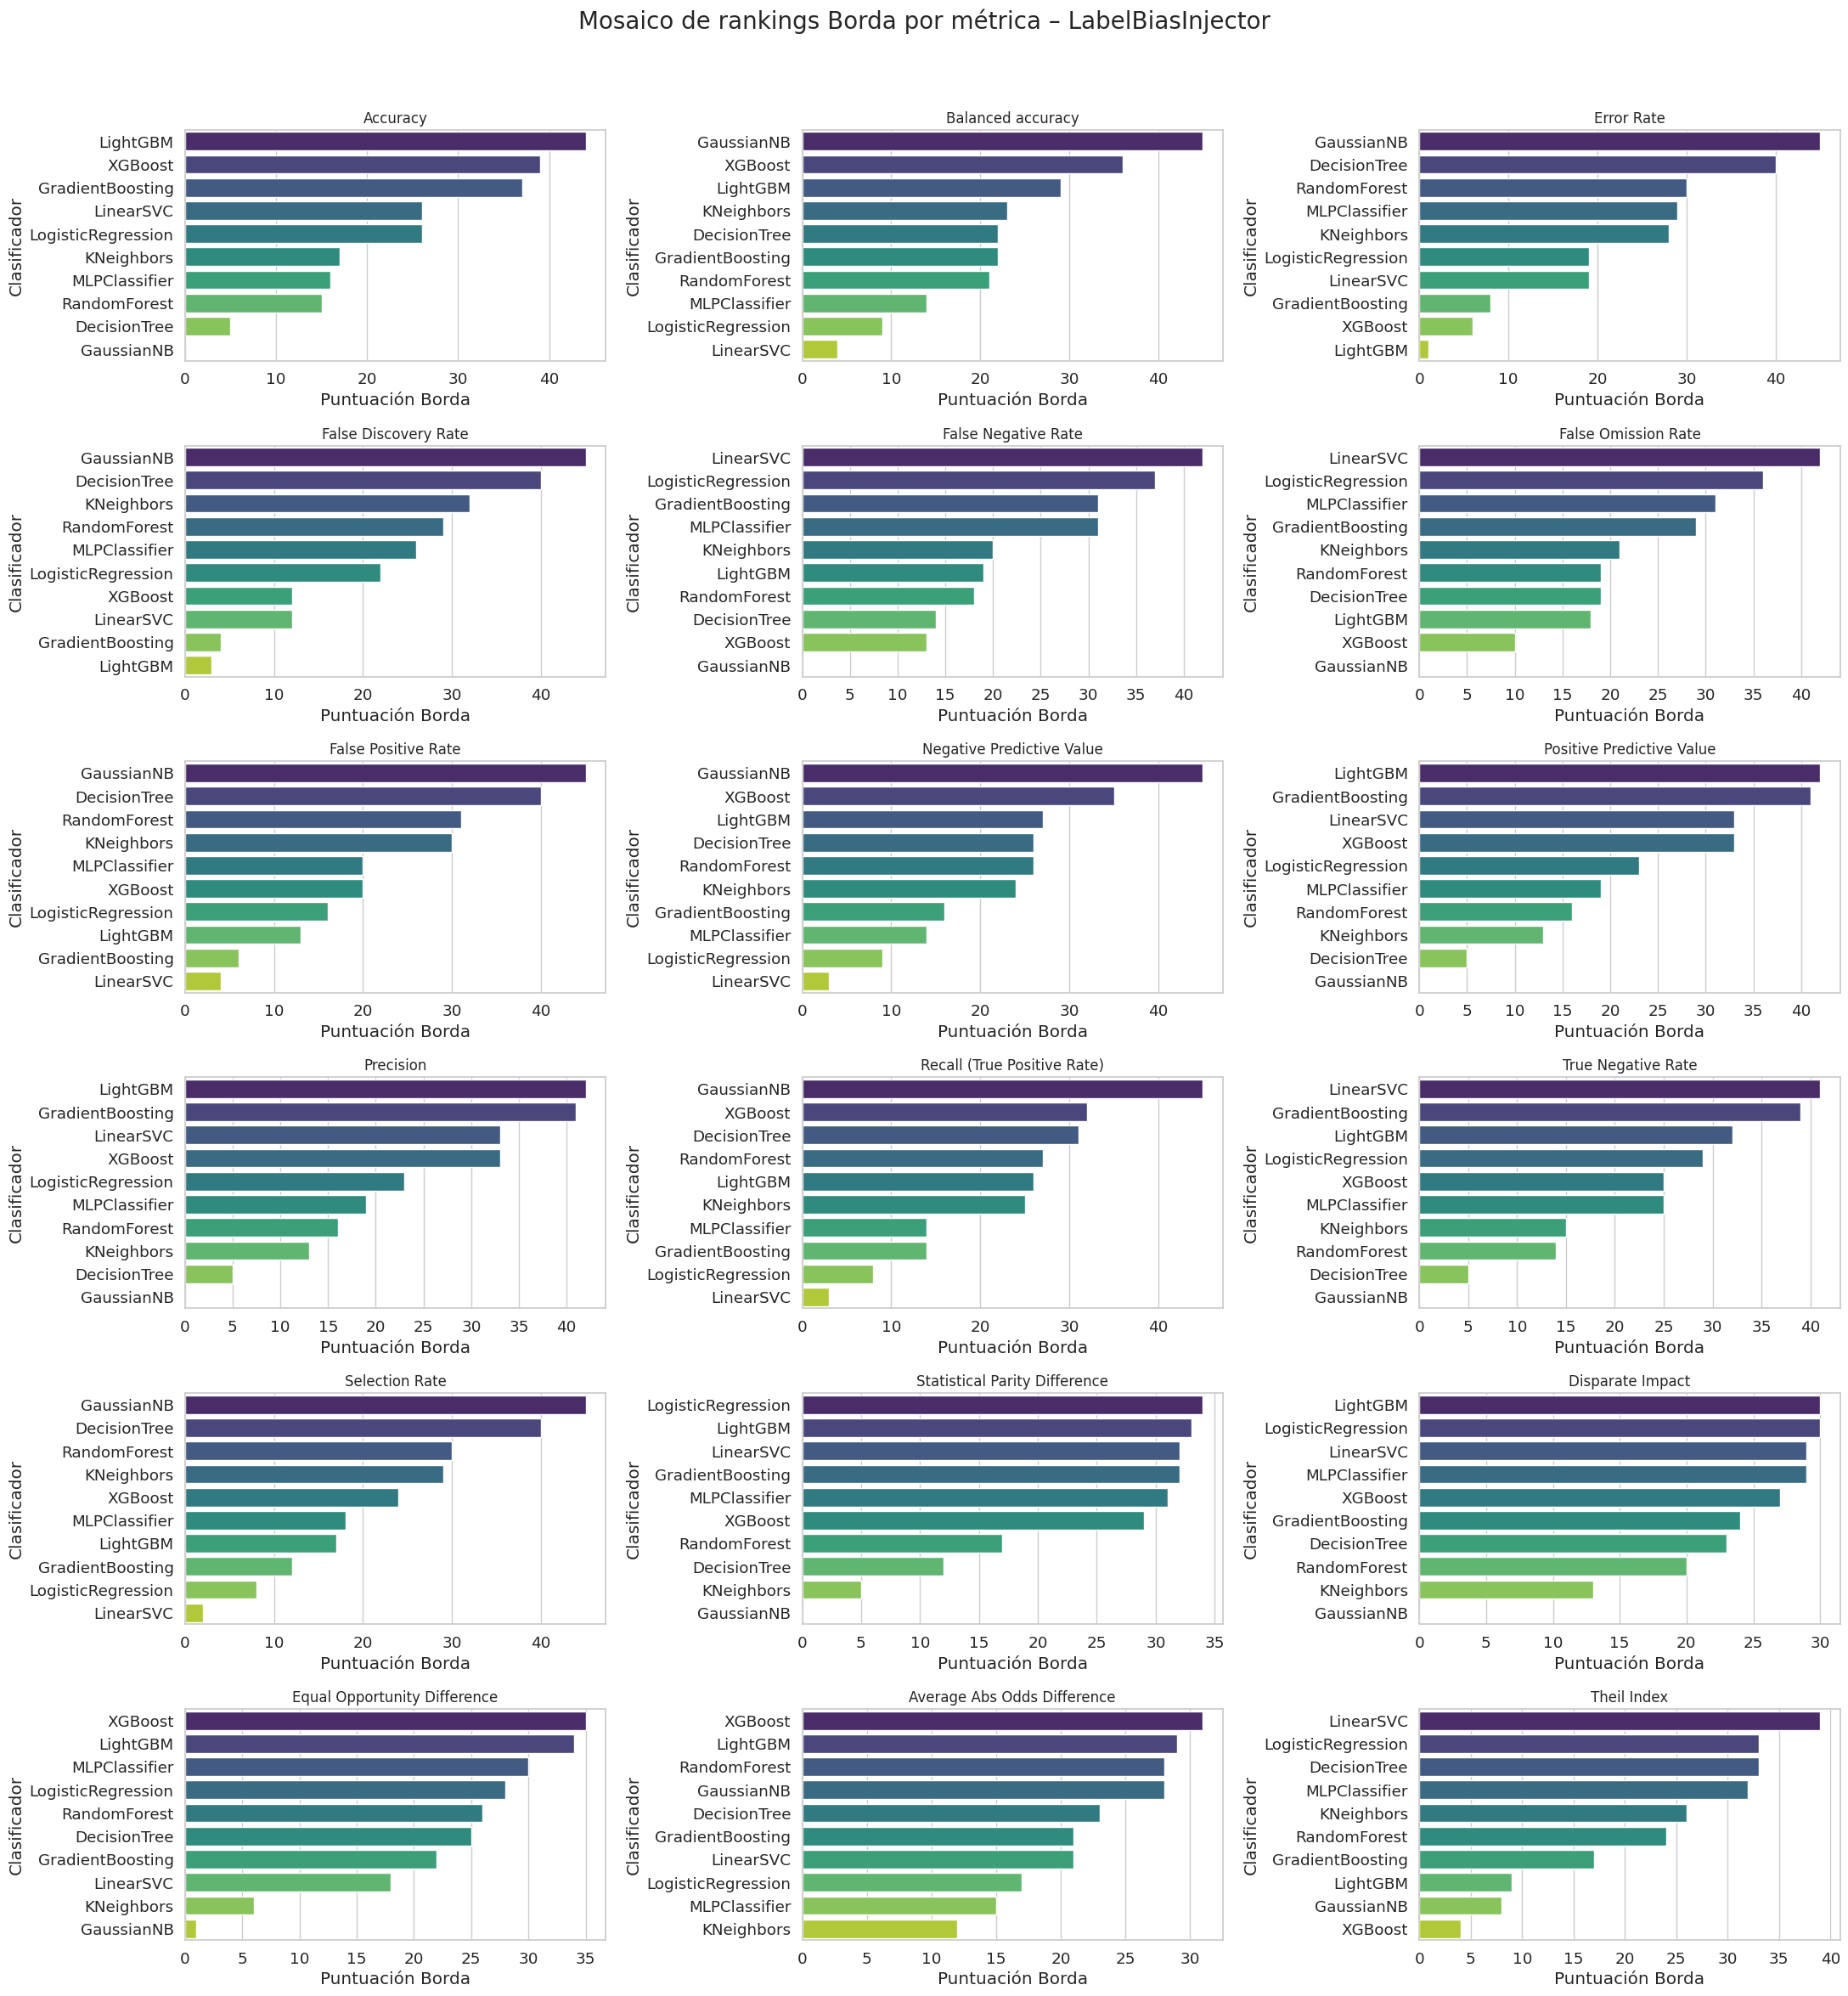

In [ ]:
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
import math

# =========================
# 1. CARGA DE DATOS
# =========================

csv_path = "/content/drive/MyDrive/ICCC26/master_experiment_results.csv"
inyector = "LabelBiasInjector"

df = pd.read_csv(csv_path)
sub = df[df["Injector"] == inyector].copy()

meta_cols = ["Alpha", "Injector", "Classifier", "Dataset"]
metric_columns = [c for c in df.columns if c not in meta_cols]
classifiers = sorted(sub["Classifier"].unique())

# =========================
# 2. VOTOS POR (ALPHA, MÉTRICA)
# =========================

votes = {}

for metric in metric_columns:
    votes[metric] = {}
    for alpha, group in sub.groupby("Alpha"):
        ranking = (
            group.groupby("Classifier")[metric]
                 .mean()
                 .sort_values(ascending=False)
                 .index.tolist()
        )
        votes[metric][alpha] = ranking

# =========================
# 3. BORDA POR MÉTRICA
# =========================

borda_metric = {}

for metric in metric_columns:
    scores = defaultdict(int)
    for alpha in votes[metric]:
        ranking = votes[metric][alpha]
        for pos, clf in enumerate(ranking[::-1]):
            scores[clf] += pos
    borda_metric[metric] = sorted(scores.items(), key=lambda x: x[1], reverse=True)

# =========================
# 4. MOSAICO DE GRÁFICAS
# =========================

num_metrics = len(metric_columns)
cols = 3
rows = math.ceil(num_metrics / cols)

plt.figure(figsize=(22, rows * 4))

for i, metric in enumerate(metric_columns, 1):
    ranking = borda_metric[metric]
    clf_names = [x[0] for x in ranking]
    clf_scores = [x[1] for x in ranking]

    plt.subplot(rows, cols, i)
    sns.barplot(x=clf_scores, y=clf_names, palette="viridis")
    plt.title(metric, fontsize=12)
    plt.xlabel("Puntuación Borda")
    plt.ylabel("Clasificador")

plt.suptitle(f"Mosaico de rankings Borda por métrica – {inyector}", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
import pandas as pd
from collections import defaultdict

# Cargar CSV
df = pd.read_csv("/content/drive/MyDrive/ICCC26/master_experiment_results.csv")

inyector = "LabelBiasInjector"
sub = df[df["Injector"] == inyector].copy()

meta_cols = ["Alpha", "Injector", "Classifier", "Dataset"]
metric_columns = [c for c in df.columns if c not in meta_cols]

# =========================
# 1. Construir votos
# =========================

votes = {}

for metric in metric_columns:
    votes[metric] = {}
    for alpha, group in sub.groupby("Alpha"):
        ranking = (
            group.groupby("Classifier")[metric]
                 .mean()
                 .sort_values(ascending=False)
                 .index.tolist()
        )
        votes[metric][alpha] = ranking

# =========================
# 2. Borda global
# =========================

scores_global = defaultdict(int)

for metric in metric_columns:
    for alpha in votes[metric]:
        ranking = votes[metric][alpha]
        for pos, clf in enumerate(ranking[::-1]):  # último = 0 puntos
            scores_global[clf] += pos

# Convertir a tabla ordenada
borda_global_df = (
    pd.DataFrame(scores_global.items(), columns=["Clasificador", "Puntuación Borda"])
      .sort_values("Puntuación Borda", ascending=False)
      .reset_index(drop=True)
)

borda_global_df


Clasificador  Puntuación Borda
0            LightGBM               448
1             XGBoost               444
2    GradientBoosting               416
3       MLPClassifier               413
4        DecisionTree               408
5        RandomForest               407
6  LogisticRegression               407
7           LinearSVC               403
8          GaussianNB               352
9          KNeighbors               352

Grupos detectados:
performance: ['Accuracy', 'Balanced accuracy', 'Error Rate', 'Precision', 'Recall (True Positive Rate)', 'True Negative Rate', 'False Positive Rate', 'False Negative Rate', 'Positive Predictive Value', 'Negative Predictive Value']
independence: ['Statistical Parity Difference', 'Disparate Impact', 'Selection Rate']
separation: ['Equal Opportunity Difference', 'Average Abs Odds Difference']
sufficiency: ['False Omission Rate', 'False Discovery Rate']
entropy: ['Theil Index']


/tmp/ipython-input-1980219423.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clf_scores, y=clf_names, palette="viridis")
/tmp/ipython-input-1980219423.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clf_scores, y=clf_names, palette="viridis")
/tmp/ipython-input-1980219423.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clf_scores, y=clf_names, palette="viridis")
/tmp/ipython-input-1980219423.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y`

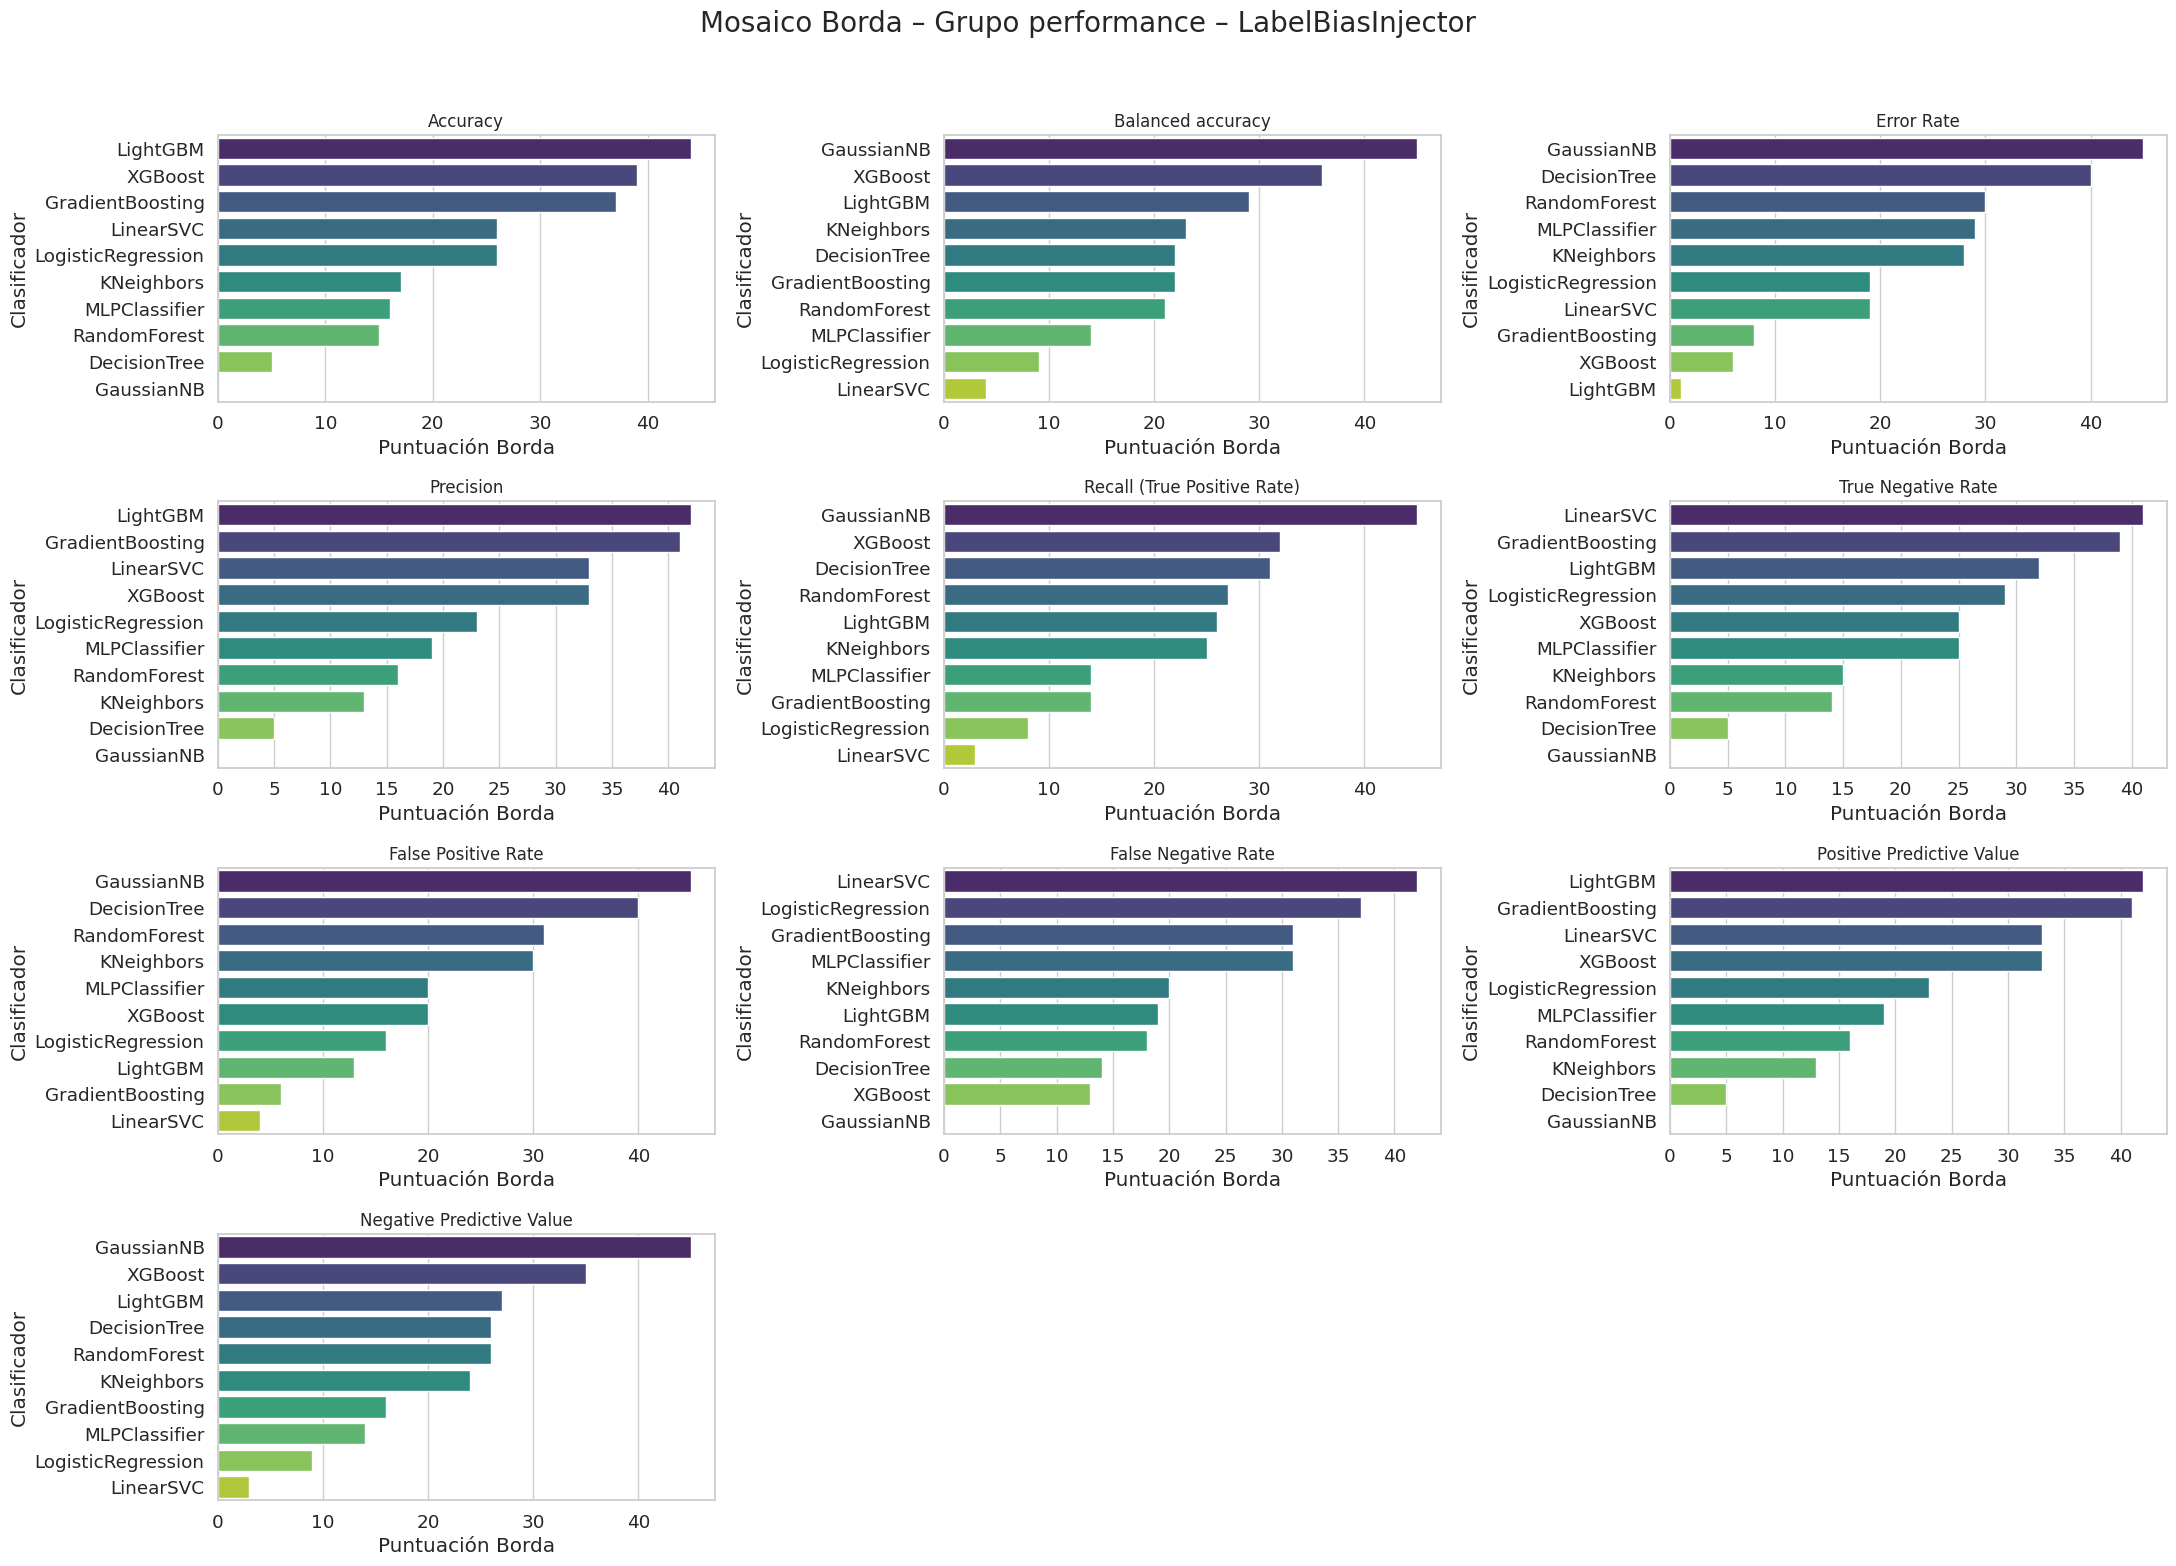

/tmp/ipython-input-1980219423.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clf_scores, y=clf_names, palette="viridis")
/tmp/ipython-input-1980219423.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clf_scores, y=clf_names, palette="viridis")
/tmp/ipython-input-1980219423.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clf_scores, y=clf_names, palette="viridis")


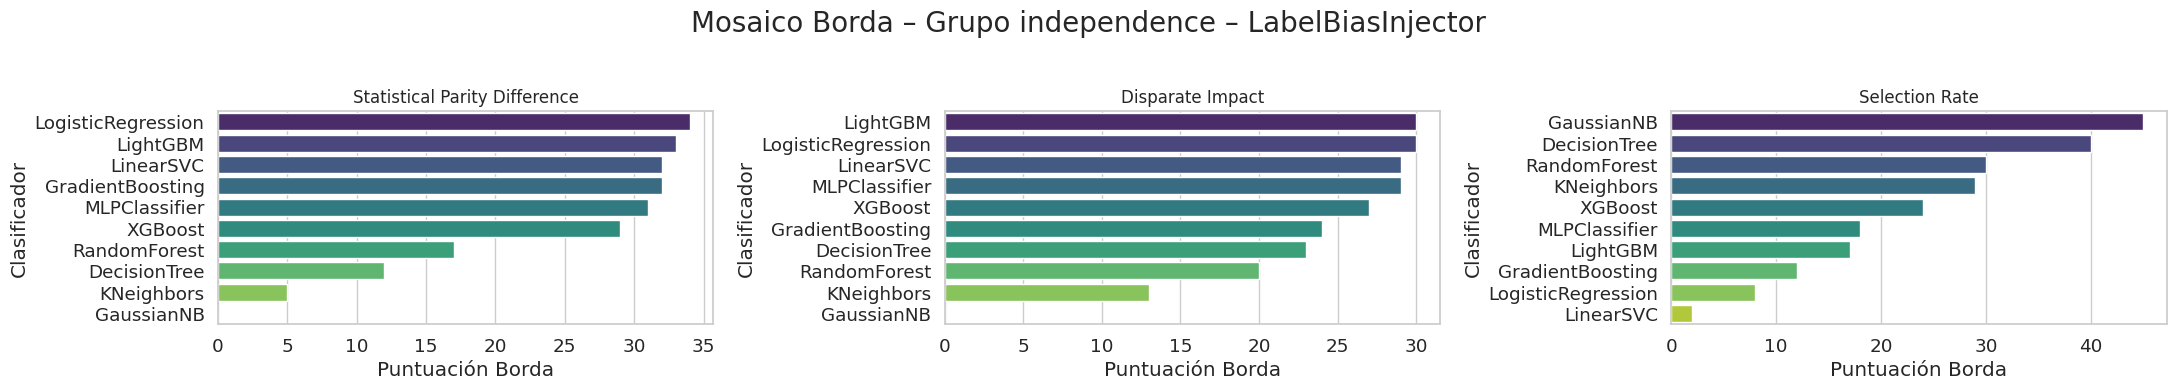

/tmp/ipython-input-1980219423.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clf_scores, y=clf_names, palette="viridis")
/tmp/ipython-input-1980219423.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clf_scores, y=clf_names, palette="viridis")


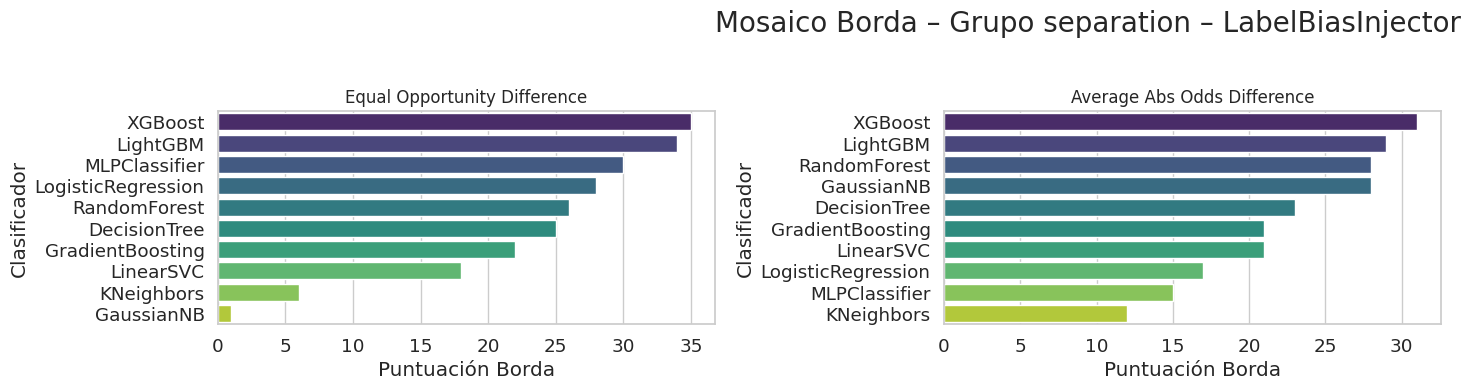

/tmp/ipython-input-1980219423.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clf_scores, y=clf_names, palette="viridis")
/tmp/ipython-input-1980219423.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clf_scores, y=clf_names, palette="viridis")


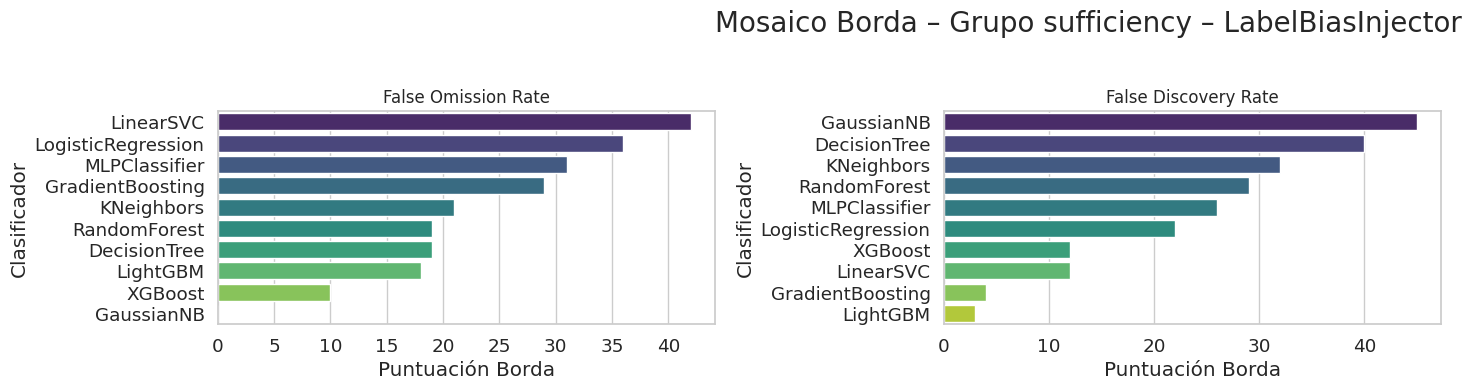

/tmp/ipython-input-1980219423.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clf_scores, y=clf_names, palette="viridis")


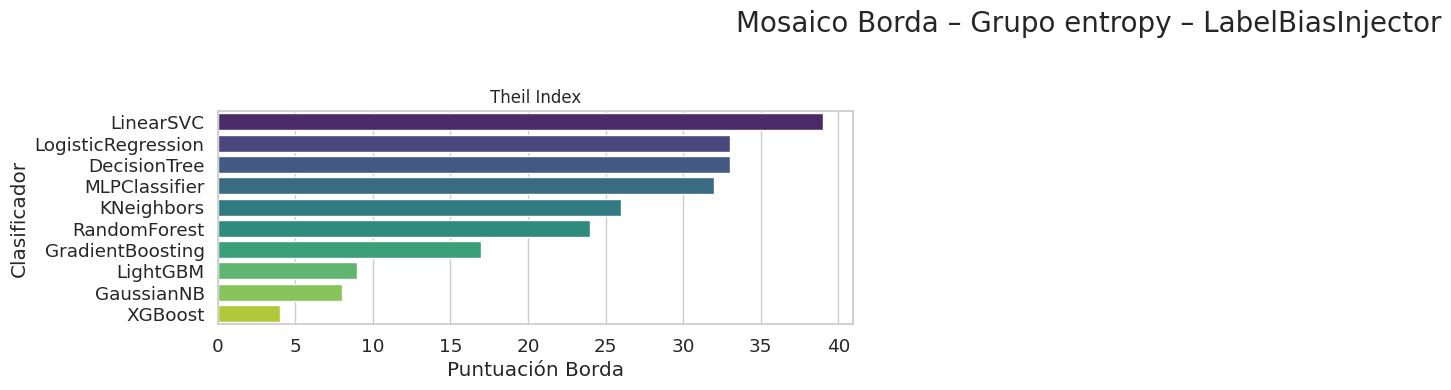

Clasificador  Puntuación Borda
0            LightGBM               448
1             XGBoost               444
2    GradientBoosting               416
3       MLPClassifier               413
4        DecisionTree               408
5        RandomForest               407
6  LogisticRegression               407
7           LinearSVC               403
8          GaussianNB               352
9          KNeighbors               352

In [ ]:
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
import math

# =========================
# 1. CARGA DE DATOS
# =========================

csv_path = "/content/drive/MyDrive/ICCC26/master_experiment_results.csv"
inyector = "LabelBiasInjector"

df = pd.read_csv(csv_path)
sub = df[df["Injector"] == inyector].copy()

meta_cols = ["Alpha", "Injector", "Classifier", "Dataset"]
metric_columns = [c for c in df.columns if c not in meta_cols]
classifiers = sorted(sub["Classifier"].unique())

# =========================
# 2. FUNCIÓN PARA DETECTAR MÉTRICAS POR PALABRAS CLAVE
# =========================

def find_metric(columns, *keywords):
    for col in columns:
        if all(k.lower() in col.lower() for k in keywords):
            return col
    return None

# =========================
# 3. GRUPOS DE MÉTRICAS
# =========================

groups = {
    "performance": [
        find_metric(metric_columns, "accuracy"),
        find_metric(metric_columns, "balanced", "accuracy"),
        find_metric(metric_columns, "error"),
        find_metric(metric_columns, "precision"),
        find_metric(metric_columns, "recall"),
        find_metric(metric_columns, "true", "negative"),
        find_metric(metric_columns, "false", "positive"),
        find_metric(metric_columns, "false", "negative"),
        find_metric(metric_columns, "positive", "predictive"),
        find_metric(metric_columns, "negative", "predictive"),
    ],
    "independence": [
        find_metric(metric_columns, "statistical", "parity"),
        find_metric(metric_columns, "disparate", "impact"),
        find_metric(metric_columns, "selection", "rate"),
    ],
    "separation": [
        find_metric(metric_columns, "equal", "opportunity"),
        find_metric(metric_columns, "average", "odds"),
    ],
    "sufficiency": [
        find_metric(metric_columns, "false", "omission"),
        find_metric(metric_columns, "false", "discovery"),
    ],
    "entropy": [
        find_metric(metric_columns, "theil"),
    ],
}

# Limpiar métricas inexistentes
for g in groups:
    groups[g] = [m for m in groups[g] if m is not None]

print("Grupos detectados:")
for g, ms in groups.items():
    print(f"{g}: {ms}")

# =========================
# 4. VOTOS POR (ALPHA, MÉTRICA)
# =========================

votes = {}

for metric in metric_columns:
    votes[metric] = {}
    for alpha, group in sub.groupby("Alpha"):
        ranking = (
            group.groupby("Classifier")[metric]
                 .mean()
                 .sort_values(ascending=False)
                 .index.tolist()
        )
        votes[metric][alpha] = ranking

# =========================
# 5. BORDA POR MÉTRICA
# =========================

borda_metric = {}

for metric in metric_columns:
    scores = defaultdict(int)
    for alpha in votes[metric]:
        ranking = votes[metric][alpha]
        for pos, clf in enumerate(ranking[::-1]):
            scores[clf] += pos
    borda_metric[metric] = sorted(scores.items(), key=lambda x: x[1], reverse=True)

# =========================
# 6. MOSAICO POR GRUPO DE MÉTRICAS
# =========================

for group_name, metrics in groups.items():

    if len(metrics) == 0:
        continue

    num_metrics = len(metrics)
    cols = 3
    rows = math.ceil(num_metrics / cols)

    plt.figure(figsize=(22, rows * 4))

    for i, metric in enumerate(metrics, 1):
        ranking = borda_metric[metric]
        clf_names = [x[0] for x in ranking]
        clf_scores = [x[1] for x in ranking]

        plt.subplot(rows, cols, i)
        sns.barplot(x=clf_scores, y=clf_names, palette="viridis")
        plt.title(metric, fontsize=12)
        plt.xlabel("Puntuación Borda")
        plt.ylabel("Clasificador")

    plt.suptitle(f"Mosaico Borda – Grupo {group_name} – {inyector}", fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
import pandas as pd
from collections import defaultdict

# Cargar CSV original
df = pd.read_csv("/content/drive/MyDrive/ICCC26/master_experiment_results.csv")

inyector = "LabelBiasInjector"
sub = df[df["Injector"] == inyector].copy()

meta_cols = ["Alpha", "Injector", "Classifier", "Dataset"]
metric_columns = [c for c in df.columns if c not in meta_cols]

# =========================
# 1. Construir votos
# =========================

votes = {}

for metric in metric_columns:
    votes[metric] = {}
    for alpha, group in sub.groupby("Alpha"):
        ranking = (
            group.groupby("Classifier")[metric]
                 .mean()
                 .sort_values(ascending=False)
                 .index.tolist()
        )
        votes[metric][alpha] = ranking

# =========================
# 2. Borda global
# =========================

scores_global = defaultdict(int)

for metric in metric_columns:
    for alpha in votes[metric]:
        ranking = votes[metric][alpha]
        for pos, clf in enumerate(ranking[::-1]):  # último = 0 puntos
            scores_global[clf] += pos

# Convertir a tabla ordenada
borda_global_df = (
    pd.DataFrame(scores_global.items(), columns=["Clasificador", "Puntuación Borda"])
      .sort_values("Puntuación Borda", ascending=False)
      .reset_index(drop=True)
)

# =========================
# 3. Exportar a CSV
# =========================

output_path = "/content/borda_global_labelbias.csv"
borda_global_df.to_csv(output_path, index=False)

borda_global_df


In [ ]:
import os
import pandas as pd
from collections import defaultdict

# =========================
# 1. CONFIGURACIÓN
# =========================

csv_path = "/content/drive/MyDrive/ICCC26/master_experiment_results.csv"
output_dir = "/content/drive/MyDrive/ICCC26/stream_results"
inyector = "LabelBiasInjector"

# Crear carpeta si no existe
os.makedirs(output_dir, exist_ok=True)

# =========================
# 2. CARGA DE DATOS
# =========================

df = pd.read_csv(csv_path)
sub = df[df["Injector"] == inyector].copy()

meta_cols = ["Alpha", "Injector", "Classifier", "Dataset"]
metric_columns = [c for c in df.columns if c not in meta_cols]

# =========================
# 3. VOTOS POR (ALPHA, MÉTRICA)
# =========================

votes = {}

for metric in metric_columns:
    votes[metric] = {}
    for alpha, group in sub.groupby("Alpha"):
        ranking = (
            group.groupby("Classifier")[metric]
                 .mean()
                 .sort_values(ascending=False)
                 .index.tolist()
        )
        votes[metric][alpha] = ranking

# =========================
# 4. BORDA GLOBAL
# =========================

scores_global = defaultdict(int)

for metric in metric_columns:
    for alpha in votes[metric]:
        ranking = votes[metric][alpha]
        for pos, clf in enumerate(ranking[::-1]):  # último = 0 puntos
            scores_global[clf] += pos

borda_global_df = (
    pd.DataFrame(scores_global.items(), columns=["Clasificador", "Puntuación Borda"])
      .sort_values("Puntuación Borda", ascending=False)
      .reset_index(drop=True)
)

# =========================
# 5. GUARDAR CSV
# =========================

output_path = f"{output_dir}/borda_global_{inyector}.csv"
borda_global_df.to_csv(output_path, index=False)

print("Archivo guardado en:", output_path)
borda_global_df


Archivo guardado en: /content/drive/MyDrive/ICCC26/stream_results/borda_global_LabelBiasInjector.csv


Clasificador  Puntuación Borda
0            LightGBM               448
1             XGBoost               444
2    GradientBoosting               416
3       MLPClassifier               413
4        DecisionTree               408
5        RandomForest               407
6  LogisticRegression               407
7           LinearSVC               403
8          GaussianNB               352
9          KNeighbors               352